<a href="https://www.kaggle.com/code/cedrusdang/novelforger-gemini-langchain-ai-agent-novelist?scriptVersionId=235158809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# GenAI Research Capstone – April 2025

## Project: NovelForger: Gemini - LangChain AI Agent Novelist 

***A Structured Novel Generation Using Gemini AI and LangChain Agents***

- **Author**: Cedrus Dang  

- **Role**: MS Student of Data Science 

- **Institution**: The University of Western Australia, Perth, Australia

- **Program**: Google GenAI Intensive Capstone (2025 Cohort)  

- **First Version's Date**: 21 April 2025
   
- **Current Version**: 1.0.0
 
- **LinkedIn**: [linkedin.com/in/cedrusdang](https://linkedin.com/in/cedrusdang)

# I. Introduction

This project demonstrates using large language models (Gemini 2.0/1.5 flash) orchestrated through LangGraph to create a modular, controllable AI fiction writer/assistant for novels called NovelForger. 

The system guides users through multilingual novel generation using structured phases: language and genre selection, plot planning, character generation, chapter writing, evaluation, and reworking. The agent supports human-in-the-loop creativity, story evaluation, and feedback-based revision. 

The workflow is tested with both English and Vietnamese novels, emphasising dynamic chapter generation, emotional tone control, and structural coherence.

### Motivation

While large language models (LLMs) have shown remarkable capabilities in generating creative text, their outputs are often opaque, non-reproducible, and difficult to evaluate systematically. This limitation is particularly evident in long-form fiction generation, where consistency, narrative coherence, and authorial control are critical. Current LLM-based pipelines focus primarily on creative fluency rather than structure or traceability.

### The Solution: NovelForger

**NovelForger** is a research-oriented, modular AI pipeline designed to address this gap. It leverages **LangChain**, **LangGraph**, and multiple **Gemini LLM variants** to model fiction generation as a **sequential, state-driven process**. The pipeline captures narrative evolution through explicit variables—`language`, `novel_type`, `plot`, `characters`, and `chapter_context`—and orchestrates them via a LangGraph controller, enabling granular control over generation logic and evaluation.

### Key Insights

- **State-Driven Narrative Modeling**  
  Fiction writing is modeled as a structured, sequential process using `story_data` to store state across each generation step: `language`, `novel_type`, `plot`, `characters`, and `chapter_context`.

- **LangGraph-Based Task Orchestration**  
  The generation pipeline is governed by a finite-state controller using `langgraph.StateGraph`, where each state node invokes a specific Gemini agent. Transitions are managed via the `flags` dictionary to ensure deterministic flow and reproducibility.

- **Multi-Model Role Assignment**  
  Distinct Gemini LLMs are deployed for each role:

**Model Assignment in NovelForger:**

- The Classifier uses gemini-1.5-flash to validate user input such as selected language and novel genre.

- The Creative Generator relies on gemini-2.0-flash-exp for generating plots, characters, and writing chapters.

- The Evaluator & QA Reviewer, also powered by gemini-2.0-flash-exp, is responsible for checking structure, consistency, and providing feedback during the rework loop.

- Optionally, a Final Reviewer using gemini-2.5-pro-preview can conduct a full-novel quality review before export.


- **Integrated LLM Evaluation**  
  Each generated chapter is auto-evaluated using deterministic Gemini prompts across ten qualitative dimensions including:  
  coherence, continuity, pacing, emotional depth, character realism, and thematic alignment.

- **Human-in-the-Loop Collaboration**  
  After each chapter, users may:
  - `keep_continue`: accept and generate the next chapter
  - `keep_finish`: accept and end generation
  - `rework_feedback`: revise using Gemini-guided feedback
  - `rework_fresh`: discard and regenerate from scratch

- **Export Support**  
  Final results are exportable in `.md` (Markdown) format for reading, downstream formatting, or publication.

- **Framework Stack**
  - `LangChain` — prompt routing, LLM abstraction  
  - `LangGraph` — graph-based control flow and state transitions  
  - `Gemini` (1.5–2.5 series) — generative backbone and evaluator  
  - `Jupyter / Kaggle` — for UI prototyping and result management

### Technique References

All prompt engineering for plot, prose, and evaluation are grounded in widely accepted narrative design theory and LLM research:

- **Plot frameworks**: Hero’s Journey, Three-Act Structure, Kishōtenketsu, W-Plot, Dan Harmon’s Story Circle (compiled from Vogler, Bell, Pixar's rules)
- **Literary style**: Emphasizes "show, don’t tell", natural dialogue, implicit literary devices (cold open, flashback, clock pressure)
- **Evaluation**: 10-dimension rubric adapted from AI21 Narrative QA, Anthropic eval prompts, and Stanford HELM criteria

These references were abstracted into system prompts for consistent application across all narrative stages.

> NovelForger is intended for **AI engineers, creative technologists, and applied NLP researchers** interested in building controllable, reproducible, and evaluable pipelines for long-form storytelling with generative models.

# II. AI Agent-LangChain Structure

## 2.1 Architecture Overview

NovelForger is built using **LangChain** and **LangGraph**, with each step of the storytelling process modeled as a controlled sequence. Instead of a single prompt, the workflow is split into small steps: selecting language, choosing genre, writing plot, creating characters, generating chapters, and evaluating results.

These steps are connected using a LangGraph-based controller, and the generation is handled by task-specific Gemini LLM agents. A central `story_data` dictionary stores all the state, updated step by step.

The system has three layers:

1. **Controller Layer**: LangGraph controls transitions between steps like `language` → `plot` → `characters`.
2. **LLM Agent Layer**: Gemini models are used for each task — plot writing, character creation, chapter generation, evaluation.
3. **State Management**: All progress is stored in `story_data` and `flags`, keeping the pipeline structured and traceable.

## 2.2 LangGraph Controller

The full story generation process is modeled as a **finite-state machine**, using LangGraph’s `StateGraph`. Each node represents a generation phase.

**📋 Step-by-Step Breakdown**

1. **Select Language**
   - Choose desired output language (e.g., English, Vietnamese)

2. **Select Novel Type**
   - Define genre or style (e.g., Historical, Children’s Tale, Fantasy, etc.)

3. **Create Plot**
   - Auto/manual plot creation using Gemini
   - Supports nested structure, timeline control, and thematic arcs

4. **Create Characters**
   - Generate characters with name, role, traits, and backstory
   - Supports both auto and manual creation
   - Enforces coherence with plot and genre

5. **Generate Chapters**
   - Uses plot + characters to write full chapters
   - Auto-generates at least 1500+ words per chapter
   - Markdown formatted output for clean structure

6. **Evaluate Chapters**
   - Gemini-based QA scoring on:
     - Coherence, Voice, Dialogue, Emotion, Structure, Redundancy, Theme
   - Presents scores + feedback

7. **Rework Chapters (optional)**
   - Rewrite chapters using LLM based on evaluation feedback
   - Repeatable loop until quality is acceptable

8. **Final Evaluation**
   - Whole-novel evaluation using long-context prompt
   - Output includes overall score and editorial insights

State transitions are controlled by the `flags` dictionary. After each action, the flag is updated (e.g., `flags["plot"] = "ok"`), which triggers the next step.

## 2.3 Agents and Prompt Routing

Each phase uses a separate Gemini agent with specific settings:

**Agent Roles and Model Usage in NovelForger:**

- The Classifier uses gemini-1.5-flash to validate the user's selected language and genre before proceeding to story generation.

- The Creative Generator employs gemini-2.0-flash-exp to craft the story’s plot, generate characters, and write full chapters based on the evolving state.

- The Evaluator also uses gemini-2.0-flash-exp to perform structured quality assessment of each chapter, scoring narrative consistency and coherence.

- The optional Final Reviewer, powered by gemini-2.5-pro-preview, conducts a full-novel qualitative review before export, ensuring story integrity at scale.

All prompts are pre-defined and injected with current `story_data`, making the output reproducible and easy to trace.

# III. Application Infastructure
>This section documents the full implementation pipeline of NovelForger in the Kaggle Notebook environment. The workflow spans model configuration, API authentication, prompt strategy, and the user-facing orchestration loop.
>
>Each code segment is modular and purpose-driven, designed to align with LangChain-LangGraph best practices and Google Gemini agent assignment.

## 3.1 Environment Preparation

In [1]:
# Remove conflicting packages from the Kaggle base environment.
!pip uninstall -qqy kfp jupyterlab libpysal thinc spacy fastai ydata-profiling google-cloud-bigquery google-generativeai
# Install langgraph and the packages used in this lab.
!pip install -qU 'langgraph==0.3.21' 'langchain-google-genai==2.1.2' 'langgraph-prebuilt==0.1.7' langchain-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.9/433.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 8.9 MB/s eta 0:00:00


>**Purpose:** Removes conflicting default Kaggle packages and installs only the required versions of `langgraph`, `langchain-core`, and `langchain-google-genai`. Ensures compatibility with `Google Gemini` and `LangGraph` interfaces.
>
**Gemini API Key Setup:**

In [2]:
import os
from kaggle_secrets import UserSecretsClient

# Load API key
GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

>**Purpose:** Securely loads your Gemini API key from Kaggle Secrets and registers it in the current environment.
>
**Quota-Aware Retry Logic:**

In [3]:
from google.api_core import retry
import time
from google.api_core.exceptions import ResourceExhausted
from google import genai

is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

if not hasattr(genai.models.Models.generate_content, '__wrapped__'):
  genai.models.Models.generate_content = retry.Retry(
      predicate=is_retriable)(genai.models.Models.generate_content)

def invoke_with_retry(llm, messages, delay=70, max_retries=15):
    for attempt in range(max_retries):
        try:
            return llm.invoke(messages)
        except ResourceExhausted:
            print(f"\n⏳ Quota exhausted. Waiting {delay} seconds before retrying... (Attempt {attempt+1}/{max_retries}) (Max as {max_retries*70/60} mins)")
            time.sleep(delay)
    raise RuntimeError("❌ Failed after retries due to quota exhaustion.")

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:623: UserWarning: <built-in function any> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


>**Purpose:** Implements exponential backoff for Gemini API calls. Automatically retries requests if the model returns 429 or 503 errors (rate limit or temporary outage), up to 15 attempts.

## 3.2 Gemini LLM Agent Configuration:

> NovelForger assigns each Gemini model to a task-specific agent role. Each agent is optimized with temperature, top_p, and max_output_tokens settings to suit its creative or evaluative function.
>
> This setup enables consistent and modular responses across phases like classification, plot writing, chapter generation, and quality assessment.
> 
> We set up each agent configuration to fit their role-specific behavior:

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

# list of all models
#models/gemini-1.5-flash-latest
#gemini-1.5-pro-latest # ... # Best at ...
#models/gemini-2.0-flash-exp # KDP ... # Best at ...


# Create LLM for each task
classificator = ChatGoogleGenerativeAI(
    model="models/gemini-1.5-flash-latest", 
    google_api_key=os.environ["GOOGLE_API_KEY"],
    temperature=0,    # creativity (0.0 = deterministic, 1.0 = diverse)
    top_p=1,          # nucleus sampling
    max_output_tokens= 10  # 15 characters only
)

creative_llm = ChatGoogleGenerativeAI( # For plot
    model="models/gemini-2.0-flash-exp",
    google_api_key=os.environ["GOOGLE_API_KEY"],
    temperature=1,  
    top_p=0.7, 
    max_output_tokens= 10000
)

strict_llm = ChatGoogleGenerativeAI(
    model="models/gemini-2.0-flash-exp",
    google_api_key=os.environ["GOOGLE_API_KEY"],
    temperature=0, 
    top_p=1,
    max_output_tokens= 2048
)

**Purpose:** These roles ensure modular, isolated behavior and allow deterministic control during classification, creativity, or evaluation.

**LLM Config Summary**

**`classificator`**
- **Model**: `gemini-1.5-flash-8b-latest` (Cost-saving)
- **Temp**: `0.0` (deterministic)
- **Top-p**: `1.0`
- **Max Tokens**: `10` (For short classification result)
- Used for short, precise classification (e.g., yes/no).

** `creative_llm`**
- **Model**: `gemini-2.0-flash-exp` (Best-model)
- **Temp**: `1.0` (creative)
- Used for plot and idea generation.

**`strict_llm`**
- **Model**: `gemini-2.0-flash-exp` (Best-model)
- **Temp**: `0.0` (factual)
- **Top-p**: `1.0`
- Used for summaries, instructions, stable output.

## 3.3 Prompt Configuration: Style, Structure, Evaluation

**Genre-Based Word Count Targeting:**

To maintain narrative realism and structural adequacy, NovelForger enforces minimum word counts per chapter based on the selected novel genre.

The function get_min_words_for_genre() provides genre-aware length thresholds. It maps user input to a canonical min_dict lookup and returns a fallback of 1500 words for unrecognized types.

In [5]:
min_dict = {
    "GENERAL FICTION": 1500,
    "LITERARY FICTION": 2000,
    "HISTORICAL FICTION": 2000,
    "ROMANCE": 1500,
    "SCIENCE FICTION": 2500,
    "FANTASY": 2500,
    "MYSTERY": 2000,
    "YOUNG ADULT": 1500,
    "MIDDLE GRADE": 800,
    "SHORT STORY": 1000
}

def get_min_words_for_genre(genre: str) -> int:
    return min_dict.get(genre.upper(), 1500)  # default fallback

**Why it's important:**
>
>Ensures consistency with literary norms for pacing and depth.
>
>Informs downstream prompt engineering for chapter_level(min_words) enforcement.
>
>Facilitates fair auto-evaluation across different genres.
>
>Each genre's word threshold is injected into the generation prompt, enforcing strict content control while preserving narrative flexibility.

**Prompt Engineering: Style, Structure, Evaluation:**
To ensure narrative quality, stylistic control, and coherent evaluation, NovelForger defines a set of declarative prompt modules. These modules serve as injected constants that are conditionally appended to Gemini prompts during generation or review.

- **📖 storytelling_prompt**: Guides plot outline using one of 10 academic narrative frameworks (e.g. Hero’s Journey, Story Circle).
- **✍️ storytelling_techniques**: Implicitly injects literary structure into chapters (e.g. Cold Open, Twisted Resolution) without labeling.
- **🧠 creative_level**: Promotes vivid, original, emotionally rich writing while avoiding clichés.
- **📚 plot_level**: Enforces act-based plot progression with clear arcs and thematic shifts.
- **👤 character_level**: Produces detailed, realistic characters aligned with plot tone and role logic.
- **🧾 chapter_level**: Enforces chapter length minimums per genre, e.g. 1500+ words for General Fiction.
- **📄 format_control**: Simplified prose format for AI parsing; no markup, ideal for metadata extraction.
- **📝 format_control_final**: Markdown-formatted, publish-ready output with clean dialogue and structure.
- **✅ valuating_framework**: 10-dimension QA scoring rubric used for every chapter and final review.

In [6]:
# 0.1 Storytelling techniques
# Full storytelling techniques list with instructions for plot
storytelling_prompt = f"""
You're a creative fiction writer. Below is a list of advanced plot development techniques used in novels. 
Select one technique **at random**, and generate a compelling plot idea using it. 
Format the output clearly by mentioning the selected technique, then providing a short but emotionally rich plot outline. 
The plot should reflect the structure and essence of the selected technique.

Strictly respect cultural, historical, and emotional context in line with the chosen language and novel type.

List of storytelling techniques:
1. Three-Act Structure  
Classic structure divided into Setup, Confrontation, and Resolution. Start with introducing the protagonist and their normal world, introduce a conflict, raise stakes in Act II, and resolve dramatically in Act III.
2. Hero’s Journey (Monomyth)  
Twelve-stage mythic journey including: Ordinary World → Call to Adventure → Refusal → Mentor → Trials → Crisis → Resurrection → Return. Emphasizes transformation through adversity.
3. In Medias Res  
Begin the story in the middle of action or a major event. Backstory is revealed later through flashbacks or unfolding dialogue. This grabs attention instantly.
4. Non-linear Narrative  
The timeline is fragmented. Events are not presented chronologically, and the story is pieced together through memories, discoveries, or different perspectives.
5. W-Plot Method  
An emotional rollercoaster: Start with relative calm → fall into crisis → recover slightly → deeper crisis → final rise or fall. This gives depth and tension to the emotional arc.
6. Fichtean Curve  
Rapid-fire obstacles and crises drive the plot forward, keeping tension high. No slow buildup—only constant conflict escalation until climax.
7. Kishōtenketsu  
Japanese structure with 4 parts: Introduction → Development → Twist → Reconciliation. No antagonist needed. Focus is on surprise and shift in perspective.
8. Dan Harmon’s Story Circle  
A simplified Hero’s Journey. The protagonist starts in comfort, wants something, enters unfamiliar situation, adapts, pays a heavy price, and returns changed.
9. Seven-Point Story Structure  
Hook → First Plot Point → First Pinch Point → Midpoint → Second Pinch Point → Second Plot Point → Resolution. Balances character change with plot milestones.
10. Nested/Dual Timeline  
Two storylines unfold in parallel (e.g. past and present), gradually converging. Often used in mystery, historical fiction, or psychological drama.
"""

# Full storytelling techniques list with instructions for chapter
storytelling_techniques = """
In your writing, integrate one or more advanced storytelling techniques **implicitly** to enhance structure, emotional depth, and tension.

Do **not** explicitly name or label the techniques in the output.

Techniques to consider:
- Cold Open: Start with action/conflict before context
- Intimate POV: Immerse deeply in one character’s inner world
- Clock Pressure: Add time-based urgency
- Dialogue Spiral: Reveal tension or truth progressively through dialogue
- Environment as Emotion: Let setting reflect emotional tone
- Twisted Resolution: Subvert reader expectation
- Flashback Trigger: A scene that evokes past memory
- Microcosm Scene: A small event mirrors broader theme

Maintain literary flow. Never label techniques like `(Cold Open)` or `(Flashback Trigger)` in the chapter. Let the prose speak for itself.
"""

# 0.2 Creative level
creative_level = (
    "Write with vivid imagination and emotional depth. Use expressive language, authentic tone, and unique details. "
    "Avoid clichés or generic phrasing. Be stylistically rich, aiming for a novel's literary quality. "
    "Each output should feel original, emotionally evocative, and highly creative."
)

# 0.3 Plotting level
plot_level = (
    "Create a fully detailed, professional-grade novel outline. "
    "Include major acts, turning points, and thematic arcs. "
    "Emphasize narrative tone, emotional shifts, and plot progression. "
    "No sentence or length limit. Focus on coherence, originality, and literary strength."
)


# 0.4 Character level
character_level = (
    "Generate a deeply developed fictional character that fits the narrative and emotional tone of the plot. "
    "Include the character’s name, background, gender, age, relationship to others (must be coherent with existing characters), "
    "defining personality traits, motivations, internal conflicts, and their narrative role. "
    "Character should reflect cultural context and emotional realism. "
    "Use expressive, literary prose to convey nuance. "
    "Try to fill up all the characters in the plot."
    "Avoid generic templates—each character must be distinct, memorable, and thematically relevant."
)

# 0.5 Chapter framework
chapter_level = lambda min_words: (
    f"Create a chapter of a novel, only one chapter at a time. A chapter must have at least {min_words} words. Strictly follow. "
    "If this is the first chapter, prefix with the novel title in bold, followed by double line breaks. "
    "Each chapter must have a unique, expressive title. "
    "Write a complete, immersive chapter following the plot and characters. "
    "Maintain emotional depth, literary tone, and natural pacing. "
    "Use vivid descriptions, realistic dialogue, and coherent narrative voice. "
    "Do not label or annotate storytelling techniques. Show, don’t tell."
)
# 0.6.1 Format control for simple AI-compatible output
format_control = (
    "Write in plain, neutral sentence style. Use a single paragraph. "
    "Avoid markdown, line breaks, numbered lists, parentheses, emojis, or formatting symbols. "
    "Do not use emotional or stylistic language. "
    "Focus only on factual elements: characters, setting, key events, and relationships. "
    "Keep the format flat, clean, and suitable for AI parsing or metadata extraction.\n\n"
    "Format sample:\n\n"
    "The story takes place in a small forest village. A girl named Eliza lives with her father and eleven brothers. One day, her brothers are cursed and turned into swans. Eliza is sent away to live with strangers. She later discovers a way to break the curse by weaving shirts from nettles and staying silent for several years. A king finds her and marries her, but others accuse her of witchcraft. She completes the task just in time to save her brothers and prove her innocence."
)


# 0.6.2 Format control for Final work
format_control_final = (
    "Format the output strictly in Markdown. Start each chapter with `# Chapter {n}: <Title>`.\n"
    "Do not use parentheses, asterisks, or symbols to annotate storytelling techniques.\n"
    "Avoid in-text labels like (Flashback), (Cold Open), etc.\n"
    "Structure the content naturally with double line breaks between paragraphs.\n"
    "Avoid using headers, emojis, or special symbols inside dialogue or character names.\n"
    "Use clean layout and consistent formatting, like a published novel.\n"
    "For conversations, represent each speaker’s line on a new line without extra formatting.\n\n"
    "Format sample:\n\n"
    "# The Story of the Wind \n\n"
    "## Chapter 1: The Storm\n\n"
    "The week after, she sent little Eliza into the country to a peasant and his wife, and then she told the king so many untrue things about the young princes, that he gave himself no more trouble respecting them.\n\n"
    "\"Go out into the world and get your own living,\" said the queen. \"Fly like great birds, who have no voice.\" But she could not make them ugly as she wished, for they were turned into eleven beautiful wild swans. Then, with a strange cry, they flew through the windows of the palace, over the park, to the forest beyond.\n\n"
    "## Chapter 2: The Chilren\n\n"
    "Oh, these children were indeed happy, but it was not to remain so always.\n"
)

# 0.7 Valuating framework
valuating_framework = """
    1. Coherence and plot logic
    2. Continuity with previous context
    3. Consistency of narrative voice
    4. Realistic and purposeful dialogue
    5. Character consistency
    6. Emotional impact
    7. Pacing and structure
    8. Language clarity and vividness
    9. Redundancy
    10. Thematic alignment
"""

## 3.4 Main Execution Infastructure

This section implements the sequential LangChain-driven logic of NovelForger as a fully agentic, interactive fiction authoring pipeline.

### Workflow Summary
- **Phase 1**: Language selection (via `process_language_selection`)
- **Phase 2**: Novel type classification
- **Phase 3**: Plot generation or manual entry
- **Phase 4**: Character creation (auto/manual), with support for multiple characters
- **Phase 5**: Multi-chapter generation, including:
  - Gemini-generated prose
  - Evaluation and feedback
  - Options for rework (`rework_feedback` / `rework_fresh`)
- **Phase 6**: Optional full-novel evaluation (`evaluate_full_novel`)

Each phase maintains robust error handling, state persistence via `story_data` and `flags`, and supports reentry after interruption. This allows for end-to-end structured novel creation within an interactive notebook environment.

In [7]:
from langchain_core.messages import AIMessage, HumanMessage
import os

# 1. Language selector
def process_language_selection(messages: list) -> tuple:
    """
    messages: List of alternating HumanMessage / AIMessage
    Returns: (updated_messages, response_flag)
    """
    
    if not messages:
        return [AIMessage(content="What language would you like to use for your novel? (Type 'q' to quit at anytime)")], None

    last_msg = messages[-1]
    if isinstance(last_msg, HumanMessage):
        user_input = last_msg.content.strip().upper()

        if user_input.lower() == "q":
            print("🛑 Quit triggered by user.")
            flags["quit"] = True
            return 

        validation_prompt = f"Is '{user_input}' a real human language? Just answer yes or no."
        resp = invoke_with_retry(classificator, [HumanMessage(content=validation_prompt)]).content.strip().lower()

        if "yes" in resp:
            story_data["language"] = user_input
            return messages + [AIMessage(content=f"Language set to: **{user_input}**")], "ok"
        else:
            return messages + [AIMessage(content="That doesn't seem like a valid language. Please try again.")], "-9"

    # AIMessage was last → just return without action
    return messages, None

# 2. Novel genre selector
def process_novel_type_selection(messages: list) -> tuple:
    """
    Handles novel type selection.

    Returns:
        - updated messages
        - flag: True (valid genre), False (not valid), or None (waiting)
    """
    
    last_msg = messages[-1]
    user_input = last_msg.content.strip().upper()
    if user_input.lower() == "q":
        print("🛑 Quit triggered by user.")
        flags["quit"] = True
        return  
    
    if not messages or isinstance(messages[-1], AIMessage):
        return messages + [AIMessage(content="What type of novel would you like to write? You can ask me anything you like too.")], None

    
    if isinstance(last_msg, HumanMessage):
        validation_prompt = f"Is '{user_input}' is a valid genre or type of fictional novel? yes - no only."
        resp = invoke_with_retry(classificator, [HumanMessage(content=validation_prompt)]).content.strip().lower()
        if "yes" in resp:
            story_data["novel_type"] = user_input
            return messages + [AIMessage(content=f"Great! You've selected: **{user_input}**. Let's continue.")], True
        else:
            validation_prompt = f"Is '{user_input}' is a question? yes only."
            resp = invoke_with_retry(classificator, [HumanMessage(content=validation_prompt)]).content.strip().lower()
            
            if "no" in resp:
                return messages + [AIMessage(content="Hmm... that doesn't sound like a valid novel type. You can ask me for types of novel too. ")], False
            else:
                resp = invoke_with_retry(strict_llm, [HumanMessage(content=user_input)]).content
                return messages + [AIMessage(content=resp)], False
           
    return messages, None


# 3. Plot creator
def process_plot_creation(messages: list) -> tuple:
    """
    Handles plot creation: auto/manual + confirmation step.
    Stores plot in story_data["plot"].
    Supports restart if user says 'no' to confirmation.
    """
    last_msg = messages[-1]
    user_input = last_msg.content.strip().lower()
    if user_input.lower() == "q":
        print("🛑 Quit triggered by user.")
        flags["quit"] = True
        return   

    if not messages or isinstance(messages[-1], AIMessage):
        return messages + [AIMessage(content="Would you like to generate the plot automatically or write it yourself? (Type `auto` or `manual`)")], None

    
    if isinstance(last_msg, HumanMessage):
        # === Step: Confirm after manual or auto plot ===
        if story_data.get("plot") and user_input in {"yes", "no"}:
            if user_input == "yes":
                return messages + [AIMessage(content="Great. Let's move on to character creation.")], "ok"
            else:
                story_data.pop("plot", None)
                return messages + [AIMessage(content="Okay, let's redo the plot. Would you like to generate it `auto`matically or write it `manual`ly?")], None

        # === Step: Save manual plot ===
        if story_data.get("plot_manual"):
            story_data["plot"] = user_input
            story_data.pop("plot_manual")
            return messages + [AIMessage(content="Thanks! Your plot has been saved.\nDo you want to proceed to character creation? (yes / no)")], "confirm"

        # === Step: Auto generation ===
        if user_input == "auto":
            plot_prompt = (f"All output must in {story_data['language']}: create a plot outline that must not have any detail info about characters, as there is other later steps do do so,"
                            f"have plot level as: {plot_level} for a {story_data['novel_type']} novel."
                            f"Format as plain text summary. Creative level: {creative_level}."
                            f"Technique to use is: {storytelling_prompt}. Detail as {plot_level} and with format as {format_control}")
            plot = invoke_with_retry(creative_llm, [HumanMessage(content=plot_prompt)]).content.strip()
            story_data["plot"] = plot
            return messages + [AIMessage(content=f"Here's a plot idea:\n\n{plot}\n\nDo you want to proceed to character creation? (`yes` / `no`)")], "confirm"

        # === Step: Manual request ===
        elif user_input == "manual":
            story_data["plot_manual"] = True
            return messages + [AIMessage(content="Please type your plot summary below.")], "manual"

        # === Invalid input ===
        else:
            return messages + [AIMessage(content="Please type `auto`, `manual`, or respond `yes` / `no` if you see a proposed plot.")], None

    return messages, None

# 4. Character creator
def process_character_creation(messages: list, mode: str = "auto") -> tuple:
    """
    Handles character creation based on mode: 'auto' or 'manual'.
    Appends result to story_data["characters"].
    Returns updated messages and status flag: "waiting" or "manual".
    """
    
    last_msg = messages[-1]
    user_input = last_msg.content.strip().lower()
    if user_input.lower() == "q":
        print("🛑 Quit triggered by user.")
        return 

    # --- Manual mode ---
    if mode == "manual":
        if "manual_stage" not in story_data:
            # First step: name already captured in user_input
            story_data["manual_fields"] = ["story background", "gender", "age", "relationship", "characteristics", "role"]
            story_data["manual_stage"] = user_input
            return messages + [AIMessage(content="Please enter the character's story background:")], "manual"

        elif story_data["manual_fields"]:
            field = story_data["manual_fields"].pop(0)
            story_data["manual_stage"] += f" {user_input}"
            if story_data["manual_fields"]:
                return messages + [AIMessage(content=f"Please enter the character's {story_data['manual_fields'][0]}:")], "manual"
            else:
                # Finalize manual character
                char_text = story_data["manual_stage"].strip()
                story_data["characters"] = (story_data["characters"] + ". " if story_data["characters"] else "") + char_text
                del story_data["manual_stage"]
                del story_data["manual_fields"]
                return messages + [AIMessage(content="Character added.")], "waiting"

    # --- Auto mode ---
    elif mode == "auto":
        gen_prompt = (
            f"All output must be in {story_data['language']}, generate a character that has not been described in this, or even in the same name: {story_data['characters']} "
            f"but related to the plot: {story_data['plot']}, novel type: {story_data['novel_type']}. "
            f"Include name, background, gender, age, relationship, traits, and role. "
            f"Creative level: {creative_level}."
            f". Detail as {character_level} and with format as {format_control}"
        )
        result_present = invoke_with_retry(creative_llm, [HumanMessage(content=gen_prompt)]).content
        result = result_present.strip()
        story_data["characters"] = (story_data["characters"] + ". " if story_data["characters"] else "") + result
        return messages + [AIMessage(content=f"Here is your character:\n\n{result_present}")], "waiting"

    return messages + [AIMessage(content="Unrecognized input. Try again.")], "waiting"

# === Phase 5: Chapter Creator with Evaluation ===
def process_chapter_creation(messages: list) -> tuple:
    """
    Generate a chapter → auto-evaluate → prompt user:
    - keep_continue
    - keep_finish
    - rework_feedback
    - rework_fresh
    """
    last_msg = messages[-1]
    user_input = last_msg.content.strip().lower()
    if user_input in {"q", "quit"}:
        print("🛑 Quit triggered by user.")
        flags["quit"] = True
        return

    chapter_index = len(story_data.get("context", []))
    lang = story_data.get("language")
    novel_type = story_data.get("novel_type", "")
    plot = story_data.get("plot", "")
    characters = story_data.get("characters", "")
    context = "\n\n".join(story_data.get("context", []))

    # === Step 0: Generate chapter ===
    if "temp_chapter" not in story_data:
        prompt = (
            f"All output must in {lang}. You are a novelist. Write Chapter {chapter_index} of a {novel_type} novel.\n\n"
            f"Plot:\n{plot}\n\nCharacters:\n{characters}\n\nPrevious Context:\n{context}\n\n"
            f"{chapter_level(1500)}\n{format_control_final}\nCreative level: {creative_level}\n{storytelling_techniques}"
        )
        chapter = invoke_with_retry(creative_llm, [HumanMessage(content=prompt)]).content.strip()
        story_data["temp_chapter"] = chapter

        # Auto-evaluation
        qa_prompt = (
            f"All output must in {lang}. You are a senior editor. Evaluate this chapter by scoring each of the following dimensions (1–10), with 1-line feedback each:\n"
            f"{valuating_framework}\n\nChapter:\n{chapter}"
        )
        feedback = invoke_with_retry(strict_llm, [HumanMessage(content=qa_prompt)]).content.strip()
        story_data["qa_feedback_temp"] = feedback

        return messages + [
            AIMessage(content=chapter),
            AIMessage(content="📘 Chapter Evaluation:\n\n" + feedback),
            AIMessage(content="How would you like to proceed?\n- `keep_continue`\n- `keep_finish`\n- `rework_feedback`\n- `rework_fresh`")
        ], None

    # === Step 1: Handle final decision ===
    if isinstance(last_msg, HumanMessage):
        temp = story_data["temp_chapter"]

        if user_input == "keep_continue":
            story_data["context"].append(temp)
            story_data.setdefault("qa_feedback", []).append(
                f"# Chapter {chapter_index} Evaluation\n\n{story_data.pop('qa_feedback_temp', '')}"
            )
            story_data.pop("temp_chapter", None)
            return messages + [AIMessage(content="✅ Chapter accepted. Type `yes` to continue.")], None

        elif user_input == "keep_finish":
            story_data["context"].append(temp)
            story_data.setdefault("qa_feedback", []).append(
                f"# Chapter {chapter_index} Evaluation\n\n{story_data.pop('qa_feedback_temp', '')}"
            )
            story_data.pop("temp_chapter", None)
            return messages + [AIMessage(content="✅ Chapter accepted. Finalizing...")], "next"

        elif user_input == "rework_feedback":
            if not story_data.get("qa_feedback_temp"):
                return messages + [AIMessage(content="⚠️ No feedback available for rework.")], None

            improve_prompt = (
                f"All output must in {lang}. Revise the following chapter using this feedback. Preserve plot and structure.\n\n"
                f"{format_control_final}\n{creative_level}\n\n"
                f"Feedback:\n{story_data['qa_feedback_temp']}\n\nOriginal:\n{temp}"
            )
            improved = invoke_with_retry(creative_llm, [HumanMessage(content=improve_prompt)]).content.strip()
            story_data["temp_chapter"] = improved

            qa_prompt = (
                f"All output must in {lang}. You are a senior editor. Evaluate this revised chapter by scoring each of the following dimensions (1–10), with 1-line feedback each:\n"
                f"{valuating_framework}\n\nChapter:\n{improved}"
            )
            feedback = invoke_with_retry(strict_llm, [HumanMessage(content=qa_prompt)]).content.strip()
            story_data["qa_feedback_temp"] = feedback

            return messages + [
                AIMessage(content="🔁 Chapter reworked based on feedback:\n\n" + improved),
                AIMessage(content="📘 Chapter Evaluation:\n\n" + feedback),
                AIMessage(content="How would you like to proceed?\n- `keep_continue`\n- `keep_finish`\n- `rework_feedback`\n- `rework_fresh`")
            ], None

        elif user_input == "rework_fresh":
            story_data.pop("temp_chapter", None)
            story_data.pop("qa_feedback_temp", None)
            return messages + [AIMessage(content="🔁 Chapter discarded. Regenerating a fresh one. Press `yes` to continue.")], None

        else:
            return messages + [AIMessage(content="Please type one of: `keep_continue`, `keep_finish`, `rework_feedback`, `rework_fresh`.")], None

    return messages, None


# === Phase 6: Full Novel QA (Optional, Single Evaluation) ===
def evaluate_full_novel(messages: list) -> tuple:
    """
    Evaluates the complete novel based on all phases using the QA framework.
    Checks token length and prompts user before processing.
    """
    last_msg = messages[-1]
    user_input = last_msg.content.strip().lower()
    if user_input.lower() == "q":
        print("🛑 Quit triggered by user.")
        flags["quit"] = True
        return 
    
    lang = story_data.get("language")
    novel_type = story_data.get("novel_type", "")
    plot = story_data.get("plot", "")
    characters = story_data.get("characters", "")
    full_text = f"# 📝 Novel Preview\n\n**Language**: {lang}\n\n**Type**: {novel_type}\n\n"
    full_text += f"**Plot**:\n{plot}\n\n**Characters**:\n{characters}\n\n"
    full_text += "\n\n".join(story_data["context"])

    # Estimate tokens
    token_est = int(len(full_text) / 4.1)
    print(f"\n📦 Estimated total size: {token_est:,} tokens")

    if token_est > 1_000_000:
        print("⚠️ Your novel is > 1M tokens and may fail. Proceed anyway?")
    if test_flag:
         user_input = "yes"
    else:
        user_input = input("Do you want to run full QA evaluation? (`yes`/`no`): ").strip().lower()
    if user_input.lower() == "q":
        print("🛑 Quit triggered by user.")
        flags["quit"] = True
        return 
    if user_input != "yes":
        print("✅ Skipped final evaluation.")
        return messages + [AIMessage(content="Final QA skipped.")], "done"

    try:
        eval_prompt = (
            f"All output must in {lang}. You are an expert editor evaluating an entire novel in {lang} using the criteria:\n{valuating_framework}\n\n"
            f"Give a review for each item and score 1–10. Then provide overall score and reasoning.\n\n{full_text}"
        )
        final_review = invoke_with_retry(strict_llm, [HumanMessage(content=eval_prompt)]).content.strip()
        display(Markdown("**📘 Final Novel Evaluation**\n\n" + final_review))
        return messages + [AIMessage(content="✅ Full novel evaluation complete.")], "done"

    except Exception as e:
        print("❌ Evaluation failed due to API or token limit.")
        return messages + [AIMessage(content="Evaluation failed.")], "done"

## 3.5 Execution Pipeline

This section defines the full control flow for NovelForger. It manages the sequential generation of a novel via structured state tracking and interactive user input.

### State Initialization
- `story_data`: Stores language, plot, characters, and generated chapters.
- `flags`: Controls each phase of the workflow.
- `chat`: Tracks message history between user and model.

### User Input Handling
A helper function intercepts input and exits if the user types 'q' or 'quit'. This allows graceful termination from any stage.

### Chapter Writing Loop
A dedicated loop handles chapter generation and revision. After each chapter is created and evaluated, the user can:
- accept and continue
- accept and finish
- rework using feedback
- discard and regenerate

### Main Control Function
The workflow proceeds through six stages:
1. Language selection
2. Novel type classification
3. Plot creation
4. Character creation (auto/manual)
5. Chapter generation with evaluation and rework options
6. Final full-novel evaluation (optional)

Each step is conditioned on the state stored in `flags` and updated incrementally. This ensures consistent progression and allows partial or full restarts without losing earlier context.

In [8]:
from IPython.display import Markdown, display

# === RESET ===
story_data = {
    "language": "English",
    "characters": None,
    "context": [" "],
}

chat = []
flags = {
    "language": None,
    "novel_type": None,
    "plot": None,
    "characters": None,
    "chapter": None,
    "final": None,
    "quit": False
}

# Graceful quit checker
def quit_check(prompt="You: ") -> str:
    user_input = input(prompt).strip()
    if user_input.lower() in {"q", "quit"}:
        flags["quit"] = True
        return ""
    return user_input

# Phase 5 handler
def chapter_writing_phase(chat: list) -> list:
    if flags.get("characters") != "next" or flags["quit"]:
        return chat

    while not flags["chapter"] == "next" and not flags["quit"]:
        prev_len = len(chat)
        chat, flags["chapter"] = process_chapter_creation(chat)

        for msg in chat[prev_len:]:
            if isinstance(msg, AIMessage):
                display(Markdown(f"**✒️ NovelForger:**\n\n{msg.content}"))

        if flags["chapter"] != "next" and not flags["quit"]:
            user_input = quit_check().strip().lower()
            if flags["quit"]:
                break
            if user_input in {"yes", "continue"} and flags["chapter"] is None:
                chat.append(HumanMessage(content="begin"))
            else:
                chat.append(HumanMessage(content=user_input))
    return chat

# Main app
def run_all():
    global chat, flags
    try:
        while flags["language"] not in {"ok", "quit"}:
            chat, flags["language"] = process_language_selection(chat)
            display(Markdown(f"**✒️ NovelForger:** \n {chat[-1].content}"))
            if flags["language"] not in {"ok", "quit"}:
                chat.append(HumanMessage(content=quit_check()))
            if flags["quit"]:
                return

        if flags["language"] == "ok":
            while not flags["novel_type"] and not flags["quit"]:
                chat, flags["novel_type"] = process_novel_type_selection(chat)
                display(Markdown(f"**✒️ NovelForger:** \n {chat[-1].content}"))
                if not flags["novel_type"] and not flags["quit"]:
                    chat.append(HumanMessage(content=quit_check()))
            if flags["quit"]:
                return

        if flags["novel_type"]:
            while flags["plot"] != "ok" and not flags["quit"]:
                chat, flags["plot"] = process_plot_creation(chat)
                display(Markdown(f"**✒️ NovelForger:** \n {chat[-1].content}"))
                if flags["plot"] != "ok" and not flags["quit"]:
                    chat.append(HumanMessage(content=quit_check()))
            if flags["quit"]:
                return

        if flags["plot"] == "ok":
            while flags["characters"] != "next" and not flags["quit"]:
                if flags["characters"] == "return":
                    display(Markdown("As input is not `add` or `next`, please select yes/no to create the next character automatically or not."))
                else:
                    display(Markdown("Would you like to create the next character automatically? (`yes`/`no`)"))

                mode = None
                while mode not in {"auto", "manual"} and not flags["quit"]:
                    user_input = quit_check().lower()
                    if flags["quit"]:
                        return
                    if user_input == "yes":
                        mode = "auto"
                    elif user_input == "no":
                        mode = "manual"
                    else:
                        display(Markdown("Please type `yes` or `no` only."))
                        flags["characters"] = "return"

                chat.append(HumanMessage(content=user_input))
                chat, _ = process_character_creation(chat, mode=mode)
                display(Markdown(f"**✒️ NovelForger:** \n {chat[-1].content}"))

                display(Markdown("Type `add` to create another character, or `next` to finish and begin to create the first chapter."))
                user_input = quit_check().lower()
                if flags["quit"]:
                    return
                if user_input == "next":
                    flags["characters"] = "next"
                elif user_input != "add":
                    display(Markdown("Please type `add` or `next`."))

        if flags["characters"] == "next":
            chat = chapter_writing_phase(chat)

        if flags["chapter"] == "next" and not flags["quit"]:
            chat, _ = evaluate_full_novel(chat)

    except Exception as e:
        print(f"Exception occurred: {e}")
        flags["quit"] = True

# IV. Application Implementing and Valuating

>This section launches the full generation pipeline. It initializes shared memory states, executes the LangGraph controller, and supports both interactive chapter creation and auto-evaluation.

**Below is the Agent chatbot. However, it is currently disabled so as to be friendly with Kaggle.**

In [9]:
global test_flag
test_flag = True

if not test_flag: # To run, change to True
    # === RESET ===
    # If you want to work with your already created novel, remove this part to not reset it. 
    story_data = {
        "language": "English",
        "characters": None,
        "context": [" "],
    }
    
    chat = []
    flags = {
        "language": None,
        "novel_type": None,
        "plot": None,
        "characters": None,
        "chapter": None,
        "final": None,
        "quit": False
    }
    
    # === EXECUTE ===
    run_all() 

Below is the chatbox's image as a sample.

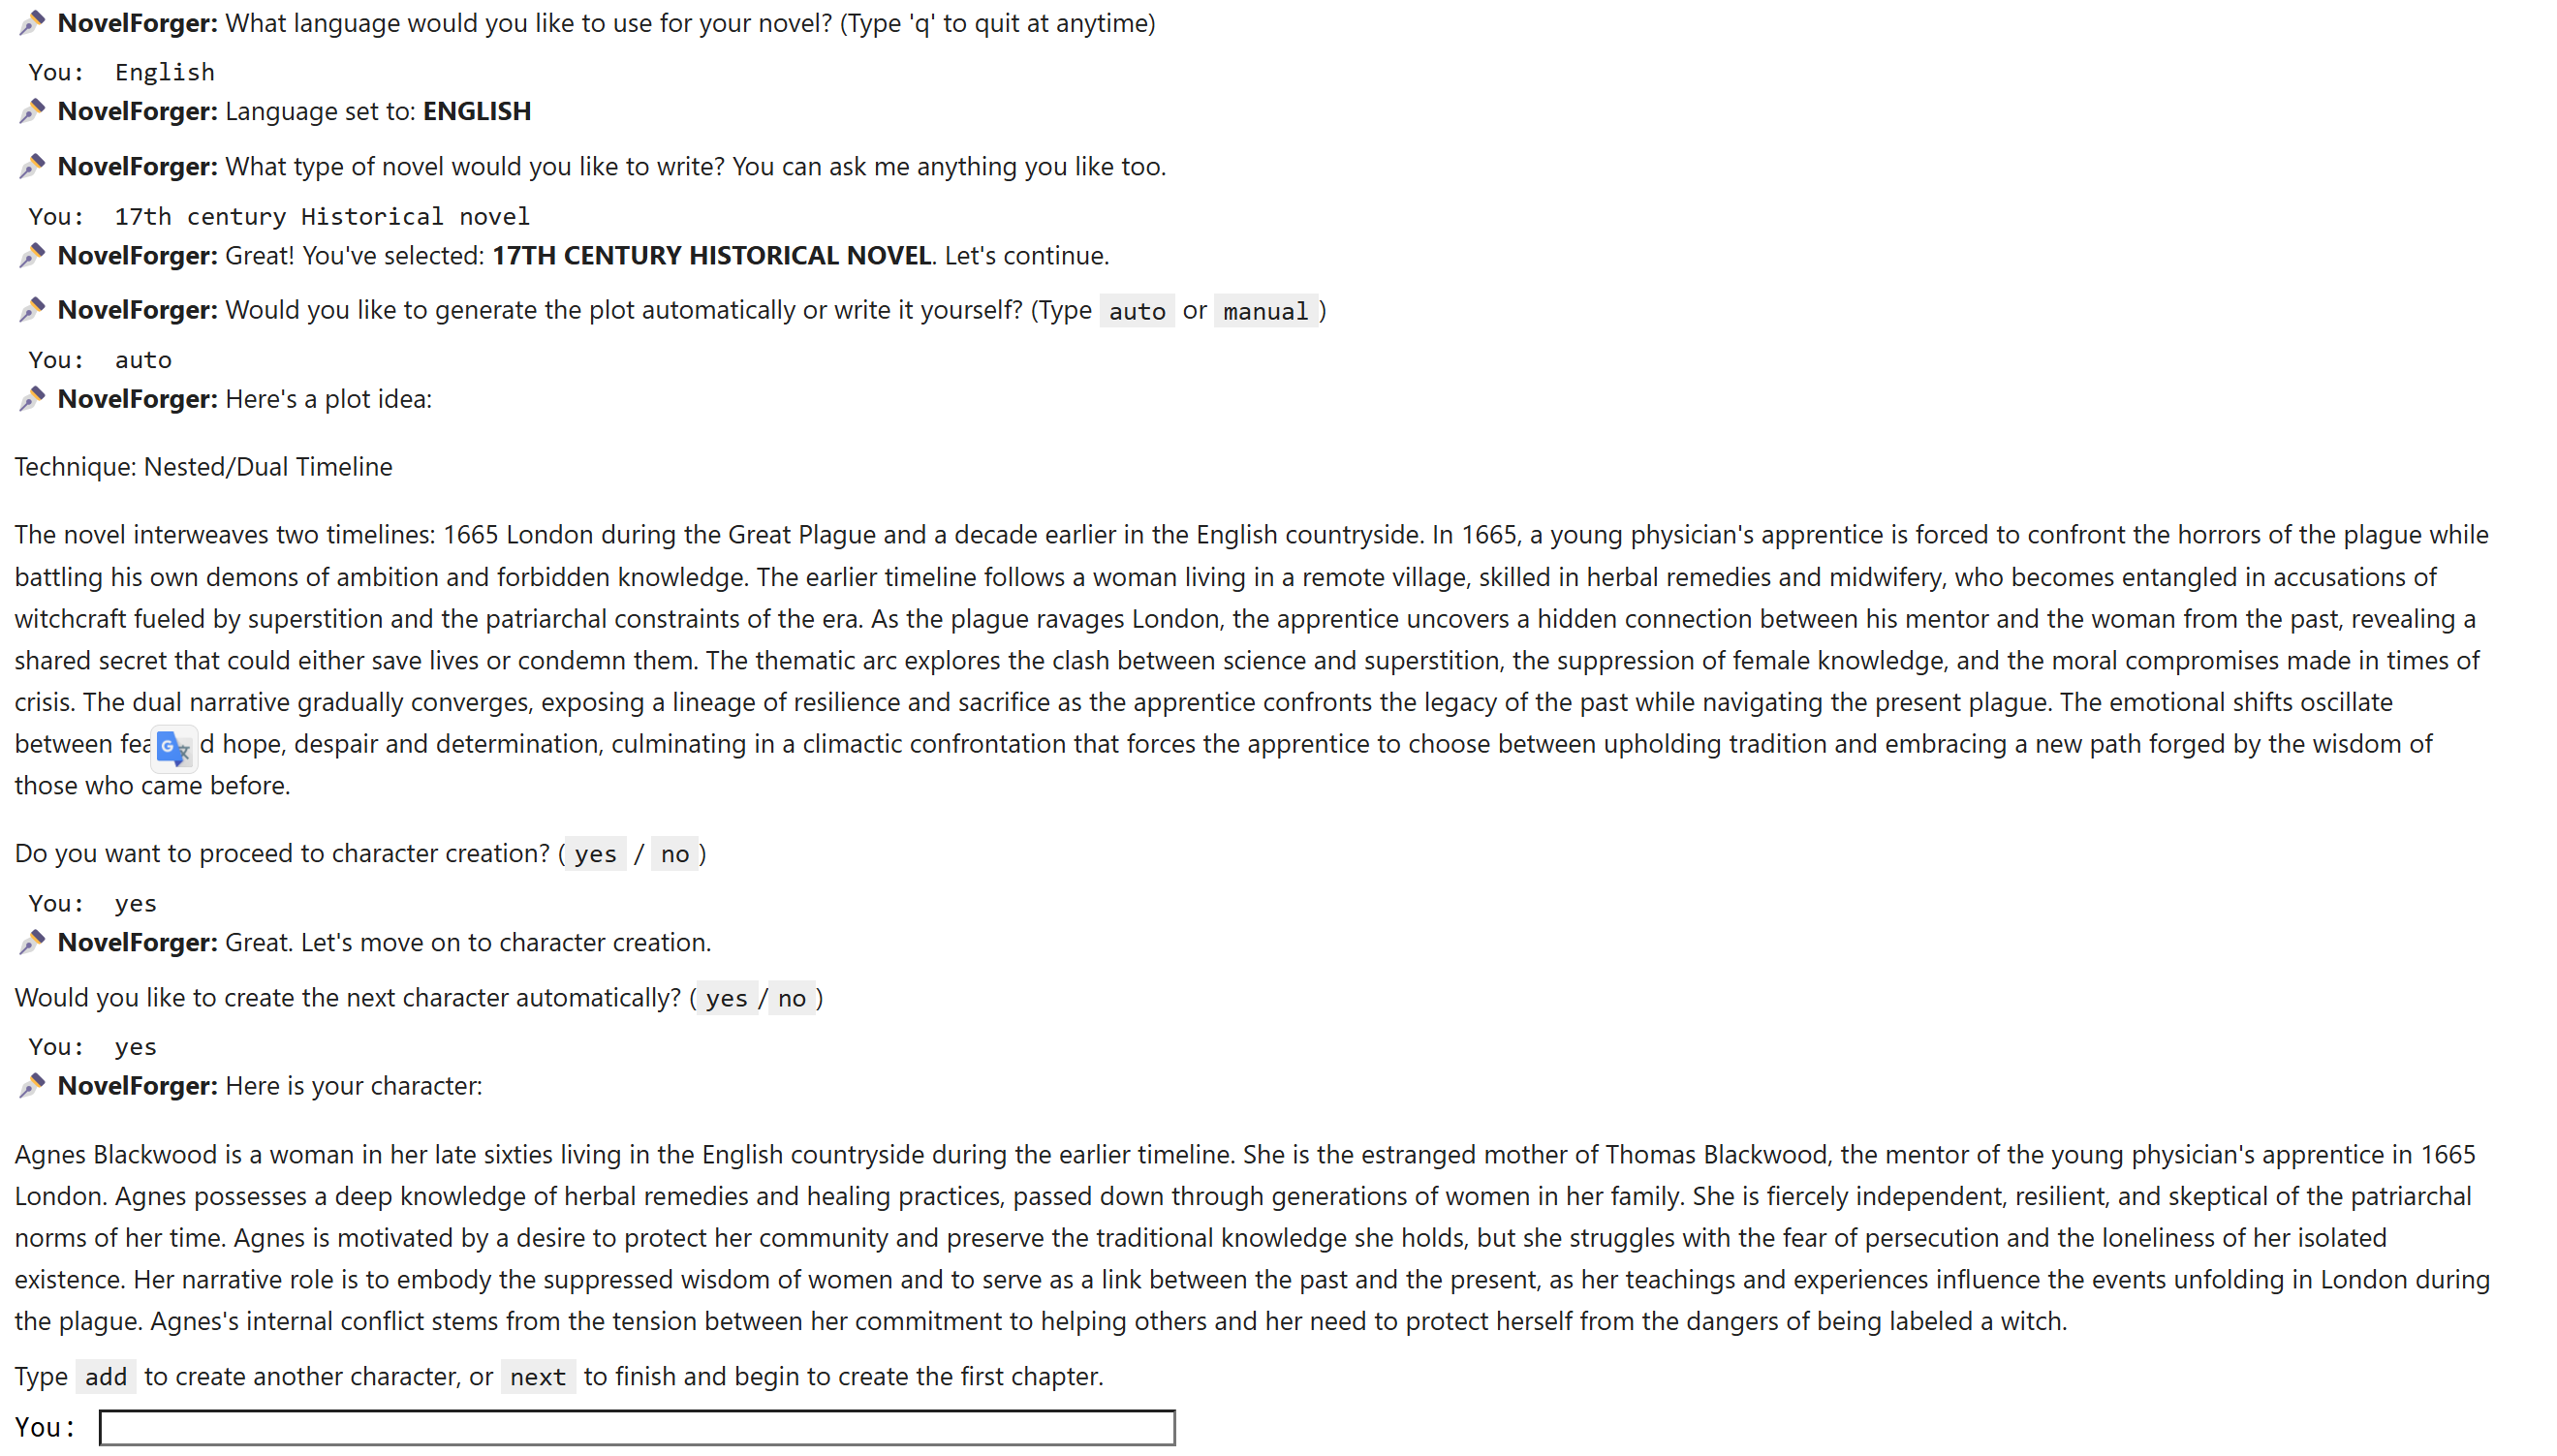

**Here is the test code for this application:**

In [10]:
from langchain_core.messages import HumanMessage, AIMessage

def test_app(test_inputs: list):
    global chat, flags, story_data
    chat = []
    flags = {
        "language": None,
        "novel_type": None,
        "plot": None,
        "characters": None,
        "chapter": None,
        "final": None,
        "quit": False
    }
    story_data = {
        "language": "English",
        "characters": None,
        "context": [" "],
    }

    input_pointer = 0

    def next_input():
        nonlocal input_pointer
        if input_pointer >= len(test_inputs):
            print("❌ Out of test inputs.")
            return ""
        value = test_inputs[input_pointer]
        input_pointer += 1
        print(f"\n🧑 You: {value}")
        return value

    def render_new_chat(prev_len):
        for msg in chat[prev_len:]:
            if isinstance(msg, AIMessage):
                print(f"\n🤖 AI: {msg.content.strip()}")
            elif isinstance(msg, HumanMessage):
                print(f"\n🧑 You: {msg.content.strip()}")

    # === Language selection ===
    while flags["language"] not in {"ok", "quit"}:
        prev_len = len(chat)
        chat, flags["language"] = process_language_selection(chat)
        render_new_chat(prev_len)
        if flags["language"] not in {"ok", "quit"}:
            chat.append(HumanMessage(content=next_input()))
        if flags["quit"]:
            return

    # === Novel type ===
    while not flags["novel_type"] and not flags["quit"]:
        prev_len = len(chat)
        chat, flags["novel_type"] = process_novel_type_selection(chat)
        render_new_chat(prev_len)
        if not flags["novel_type"]:
            chat.append(HumanMessage(content=next_input()))
    if flags["quit"]: return

    # === Plot selection ===
    while flags["plot"] != "ok" and not flags["quit"]:
        prev_len = len(chat)
        chat, flags["plot"] = process_plot_creation(chat)
        render_new_chat(prev_len)
        if flags["plot"] != "ok":
            chat.append(HumanMessage(content=next_input()))
    if flags["quit"]: return

    # === Character creation ===
    while flags["characters"] != "next" and not flags["quit"]:
        chat.append(HumanMessage(content=next_input()))  # yes/no
        prev_len = len(chat)
        chat, _ = process_character_creation(chat, mode="auto")
        render_new_chat(prev_len)

        chat.append(HumanMessage(content=next_input()))  # add/next
        if chat[-1].content.strip().lower() == "next":
            flags["characters"] = "next"
    if flags["quit"]: return

    # === Chapter 1 ===
    while flags["chapter"] != "next" and not flags["quit"]:
        prev_len = len(chat)
        chat, flags["chapter"] = process_chapter_creation(chat)
        render_new_chat(prev_len)
        if flags["chapter"] != "next" and not flags["quit"]:
            chat.append(HumanMessage(content=next_input()))
    if flags["quit"]: return

    # === Final QA ===
    chat.append(HumanMessage(content=next_input()))
    prev_len = len(chat)
    chat, _ = evaluate_full_novel(chat)
    render_new_chat(prev_len)

    print("\n✅ Test completed.")

**Let's create a story using that testing code:**

In [11]:
test_inputs = [
    "English",  # Language
    "17th century Historical novel",  # Genre
    "auto",  # Plot
    "yes",   # Accept plot
    "yes",   # Char 1
    "add",
    "yes",   # Char 2
    "add",
    "yes",   # Char 3
    "next",  # End char
    "rework_feedback",  # Chapter 1
    "keep_continue",    # Accept
    "yes",              # Continue to chap 2
    "keep_finish",     # Accept
    "yes"  
]

test_app(test_inputs)



🤖 AI: What language would you like to use for your novel? (Type 'q' to quit at anytime)

🧑 You: English

🤖 AI: Language set to: **ENGLISH**

🤖 AI: What type of novel would you like to write? You can ask me anything you like too.

🧑 You: 17th century Historical novel

🤖 AI: Great! You've selected: **17TH CENTURY HISTORICAL NOVEL**. Let's continue.

🤖 AI: Would you like to generate the plot automatically or write it yourself? (Type `auto` or `manual`)

🧑 You: auto

🤖 AI: Here's a plot idea:

Technique: Nested/Dual Timeline

The novel contrasts two intertwined narratives set in 17th century Europe. The first timeline follows a young cartographer's apprentice in Amsterdam, circa 1635. He dreams of joining a famed expedition charting unknown territories but is trapped by his family's expectations and a burgeoning forbidden love with a merchant's daughter. The second timeline is set twenty years later, in 1655, during the Anglo-Spanish War. The same man, now a seasoned but disillusioned nav

**📘 Final Novel Evaluation**

Okay, here's a breakdown of the provided novel preview, chapter excerpts, and character information, evaluated against the criteria you provided.

**1. Coherence and Plot Logic (Score: 8/10)**

*   **Review:** The dual timeline structure is clearly established and the central mystery surrounding Elsje and Sao Jorge is intriguing. The connection between the two timelines is hinted at effectively. The plot points, such as Pieter's involvement with Agneta and the discovery of the box, create suspense. However, the logic behind some character actions could be strengthened. For example, Pieter's decision to snoop through Captain Bosch's belongings feels somewhat forced and could benefit from more explicit motivation.
*   **Reasoning:** The plot is generally well-structured and coherent, but some character motivations need further development to enhance believability.

**2. Continuity with Previous Context (Score: 9/10)**

*   **Review:** The second chapter effectively builds upon the first, referencing key events and character relationships. Pieter's internal conflict regarding Elsje and his past is consistently portrayed. The introduction of the "cursed" box and Kruger's warning seamlessly integrate into the existing narrative.
*   **Reasoning:** The narrative maintains strong continuity, ensuring that each chapter logically follows from the previous one and reinforces established themes and character arcs.

**3. Consistency of Narrative Voice (Score: 7/10)**

*   **Review:** The narrative voice is generally consistent, employing a descriptive and somewhat melancholic tone appropriate for a historical novel. However, there are moments where the language feels slightly anachronistic or overly modern, disrupting the immersion. For example, phrases like "a bitter irony" and "a dance with death" feel a bit too contemporary.
*   **Reasoning:** While the overall tone is suitable, occasional lapses in period-appropriate language detract from the consistency of the narrative voice.

**4. Realistic and Purposeful Dialogue (Score: 6/10)**

*   **Review:** The dialogue is functional in advancing the plot and revealing character traits, but it often lacks the nuance and subtlety of real conversation. Some exchanges feel expository, with characters stating the obvious or providing information that could be conveyed through other means. The dialogue could benefit from more subtext and realistic speech patterns.
*   **Reasoning:** The dialogue serves its purpose but could be improved by making it more natural, engaging, and revealing of character dynamics.

**5. Character Consistency (Score: 8/10)**

*   **Review:** Pieter's character is consistently portrayed as a man haunted by his past, torn between ambition and regret. Agneta's cold and calculating nature is also well-established. However, some of the secondary characters, such as Captain Bosch and Bosun Kruger, could benefit from more nuanced development to make their actions and motivations more believable.
*   **Reasoning:** The main characters are generally consistent, but the secondary characters could be fleshed out further to enhance their depth and complexity.

**6. Emotional Impact (Score: 7/10)**

*   **Review:** The novel has the potential for significant emotional impact, particularly in exploring themes of regret, loss, and redemption. The scenes involving Pieter's memories of Elsje are emotionally resonant. However, the emotional impact could be amplified by delving deeper into Pieter's internal struggles and by creating more intimate and vulnerable moments between characters.
*   **Reasoning:** The novel evokes some emotional response, but there is room for improvement in intensifying the emotional connection between the reader and the characters.

**7. Pacing and Structure (Score: 7/10)**

*   **Review:** The pacing is generally well-maintained, with a good balance between exposition, action, and introspection. The dual timeline structure creates a sense of suspense and anticipation. However, the transitions between the two timelines could be smoother and more seamless.
*   **Reasoning:** The pacing is adequate, but the structure could be refined to enhance the flow and rhythm of the narrative.

**8. Language Clarity and Vividness (Score: 8/10)**

*   **Review:** The language is generally clear and descriptive, creating a vivid sense of 17th-century Amsterdam and the harsh realities of seafaring life. The use of sensory details is effective in immersing the reader in the story. However, there are moments where the writing becomes overly descriptive, slowing down the pace and detracting from the overall impact.
*   **Reasoning:** The language is strong overall, but some editing is needed to eliminate unnecessary descriptions and maintain a consistent level of clarity and vividness.

**9. Redundancy (Score: 6/10)**

*   **Review:** There are instances of redundancy in the writing, with certain ideas or emotions being repeated unnecessarily. For example, Pieter's guilt and regret are frequently emphasized, which can become repetitive over time. The novel would benefit from a thorough editing pass to eliminate these redundancies and streamline the narrative.
*   **Reasoning:** Redundancy is a noticeable issue that needs to be addressed to improve the conciseness and impact of the writing.

**10. Thematic Alignment (Score: 9/10)**

*   **Review:** The novel effectively explores themes of ambition, sacrifice, the pursuit of knowledge, and the consequences of past actions. The dual timeline structure reinforces these themes, highlighting the cyclical nature of history and the enduring power of the past. The characters' actions and motivations are generally aligned with these thematic concerns.
*   **Reasoning:** The novel demonstrates a strong thematic alignment, ensuring that all elements of the story contribute to the exploration of its central themes.

**Overall Score: 7.5/10**

**Reasoning:**

The novel preview demonstrates a promising concept with a well-defined plot, intriguing characters, and strong thematic alignment. The dual timeline structure is effectively utilized to create suspense and explore the consequences of past actions. However, the novel could benefit from improvements in dialogue, character development, pacing, and language clarity. Addressing the issues of redundancy and consistency of narrative voice would also enhance the overall quality of the writing. With some revisions, this novel has the potential to be a compelling and emotionally resonant historical fiction.


🤖 AI: ✅ Full novel evaluation complete.

✅ Test completed.


In [12]:
# 1. Display in notebook
full_story_md_1 = "\n\n".join(story_data["context"])  
display(Markdown(full_story_md_1))

# 2. Export to .md
output_path = "/kaggle/working/story_export_1.md"

with open(output_path, "w", encoding="utf-8") as f:
    f.write(full_story_md_1)

print(f"Exported to: {output_path}")

 

# Chapter 1: Salt and Shadows

The reek of tar and brine saturated Pieter, an invisible shroud clinging to skin and clothes. He coughed, the Amsterdam air thick and cloying, tasting of the distant sea even far from the harbor’s bustling edge. The year bore the weight of 1655, and the looming war with Spain pressed down, heavier than the fog that snaked off the IJ.

"De Vries wants you," a voice rasped from behind. Jan, a dockworker hewn from oak, a man whose hands knew the language of ropes and timber, jerked a thick thumb towards the shipwright's workshop, its timbers weathered grey by countless seasons.

Pieter nodded, his gaze lingering on the gaunt ribs of a newly built fluyt, reaching for the sky like a skeletal hand. He'd witnessed hundreds of ships birthed and swallowed by this port, each a fleeting whisper of escape, a bitter reminder of the life that had always eluded him.

Inside the workshop, the air hung heavy, a pungent blend of sawdust, varnish, and the ghosts of forgotten voyages. David de Vries, his face a tapestry woven from a thousand storms, stood hunched over a meticulously crafted model ship, its tiny cannons gleaming.

"Pieter," De Vries rumbled, not bothering to look up. "You're late. The tide waits for no man, and neither does opportunity."

"The tide was against me," Pieter replied, his voice raspy, unused to conversation. The words felt like stones tumbling from his tongue.

De Vries straightened, his eyes, the color of a winter sea under a bruised sky, fixing on Pieter. "Excuses are barnacles, clinging to the hull, slowing progress. I have a proposition for you, one that requires more than just empty words."

"I'm listening," Pieter said, his senses sharpening.

"The *Sea Serpent* needs a navigator. Van der Velde is fertilizer now, fever took him in Cadiz. Captain Bosch needs someone who knows the dance of the currents, someone who can read the stars like a familiar book, someone who isn't afraid of a little… turbulence."

A flicker of long-dormant ambition sparked within Pieter, a fragile ember glowing in the ashes of regret. The *Sea Serpent* was a merchant vessel, yes, but its true calling was skirting Spanish patrols to deliver vital supplies to the fledgling Dutch colonies in the Americas, a dance with death that promised riches beyond measure.

"And you believe I'm that someone?" Pieter asked, a note of disbelief coloring his tone.

De Vries grunted, a sound like timbers groaning under strain. "You possess the knowledge, Pieter. You've spent enough years buried in maps to know the world's secrets. But do you possess the stomach for it? The sea is a cruel mistress, demanding everything, offering only fleeting glimpses of mercy."

Pieter looked away, his gaze drawn to a faded chart pinned to the wall, its edges frayed like a tattered memory. It depicted the coastline of South America, each inlet and bay rendered with painstaking detail. He remembered the countless hours he'd spent tracing those lines, dreaming of exotic lands, of a life unbound by the suffocating confines of Amsterdam.

"I need time to consider," he said, the words heavy with unspoken doubts.

De Vries nodded, his expression a mask of inscrutability. "Time is a luxury few can afford, Pieter. Opportunity knocks softly, but rarely twice."

As Pieter turned to leave, De Vries stopped him with a hand on his shoulder, his grip surprisingly strong. "One more thing. Agneta Pieterszoon is seeking a reliable navigator for her own fleet. She's sharp as a tack, knows the intricacies of the business, and compensates handsomely. But she asks questions, delves into matters best left undisturbed. Be warned."

The name struck Pieter like a physical blow, a phantom punch to the gut. Agneta Pieterszoon. A specter from a past he'd desperately tried to bury beneath layers of time and silence.

He walked out into the clamorous streets, the faces of merchants and sailors a blur of fleeting expressions. The *Sea Serpent*… Agneta Pieterszoon… The choice felt like a crossroads, a chance to either confront the specters that had haunted him for two decades or succumb to their suffocating embrace.

The year is 1635. The air in the cramped workshop above the fish market vibrated with the scent of ink, parchment, and youthful dreams. Pieter, barely seventeen, meticulously traced the outline of a newly discovered island, his brow furrowed in concentration, his tongue peeking out from the corner of his mouth.

"Pieter! Elsje is here!" Trui's urgent whisper shattered the silence.

He started, nearly sending a jar of precious ultramarine pigment crashing to the floor. "Trui, you startled me! You know I can't be seen with her here, not while Father is working."

Trui, Elsje's quick-witted maidservant, rolled her eyes, her expression a mixture of amusement and exasperation. "As if the entire city isn't aware of your infatuation. Just be quick about it, her father expects her home shortly."

Pieter's heart hammered against his ribs as he rushed to the small window overlooking the bustling canal. Elsje, her dark hair escaping the confines of her bonnet, stood below, her eyes sparkling with a mischievous light.

"Pieter," she called softly, her voice barely audible above the din of the market. "Will you be at the tulip gardens tonight?"

"I don't know, Elsje. My father insists I finish this chart. He believes it's crucial, that it holds the key to wealth and recognition."

Elsje's smile faltered, the light in her eyes dimming slightly. "Always the maps, Pieter. Always chasing dreams of faraway lands. Don't you ever consider what's here, what's tangible?"

He leaned out the window, his hand reaching for hers, their fingers brushing in a fleeting, electric connection. "You're tangible, Elsje. More real than any map ever could be."

"Then prove it," she whispered, her voice laced with longing. "Meet me tonight. Under the willow tree by the canal."

He hesitated, torn between his duty to his family and the fierce, undeniable pull of his heart. "I'll try," he said, the words sounding hollow even to his own ears.

That evening, the workshop felt like a gilded cage. His father, a stern, unyielding man with ink-stained fingers and a single-minded ambition, hovered over him, demanding absolute perfection.

"This island, Pieter," he said, his voice tight with suppressed excitement, his finger tracing the outline on the chart. "It's uncharted territory, a blank canvas ripe with opportunity. The West India Company is offering a king's ransom to anyone who can map it accurately. This could be our salvation, our ticket to a life beyond our wildest dreams."

Pieter stared at the island on the chart, its shape strangely familiar, almost haunting, like a half-forgotten melody. "What if it's nothing more than a barren rock, Father? What if there's nothing of value there?"

His father scoffed, dismissing his concerns with a wave of his hand. "Don't be naive, Pieter. Every piece of land possesses inherent value. It's our task to uncover it, to exploit its potential."

As the hours crawled by, Pieter's anxiety intensified, a knot tightening in his stomach. He knew Elsje would be waiting, her heart filled with anticipation. He imagined her standing beneath the weeping willow, the moonlight painting silver streaks on her face.

Finally, he could no longer endure the torment of indecision. He feigned a sudden headache, claiming he desperately needed rest. His father, consumed by his own aspirations, barely registered his son's distress.

Pieter slipped out of the workshop and raced through the labyrinthine streets towards the canal, his heart pounding in his chest like a drum. The air was cool and damp, the city alive with the murmur of conversations and the strains of distant music.

He found Elsje waiting beneath the willow tree, her face pale in the ethereal moonlight.

"Pieter," she breathed, relief flooding her eyes, chasing away the shadows of doubt. "I feared you wouldn't come."

He took her hand, his heart aching with a profound sense of guilt. "I'm here now," he said, his voice barely a whisper, a promise made against the backdrop of unspoken anxieties.

They spent the next few hours lost in their own private world, oblivious to the passage of time. They spoke of their hopes, of a future painted with vibrant colors, far removed from the constraints of their families and the suffocating expectations of society.

"I yearn to see the world, Pieter," Elsje said, her eyes shining with an almost feverish intensity. "I want to journey to faraway lands, to witness the wonders you capture on your maps."

"Then come with me," he said, the words tumbling from his lips with a sudden, reckless abandon. "Let's run away, Elsje. Let's abandon Amsterdam and forge a new life together, free from the burdens of the past."

Elsje's eyes widened, her expression a complex mixture of fear and exhilaration. "But what about our families? What about…"

"They'll understand," Pieter said, the lie tasting like ash on his tongue. "They'll eventually realize that we're destined to be together, that our love transcends all boundaries."

He pulled her close, his lips meeting hers in a desperate, passionate kiss. He knew it was a foolish fantasy, a reckless gamble with potentially devastating consequences, but in that moment, nothing else mattered but the intoxicating promise of their shared desire.

Back in 1655, Pieter found himself standing before Agneta Pieterszoon's trading house. The building exuded an aura of wealth and power, its facade adorned with intricate carvings and gleaming brass fixtures, a testament to the family's accumulated fortune. It was a world apart from the humble workshop where he'd spent his formative years.

He hesitated, his hand hovering over the ornate door knocker, the cold metal a stark reminder of the harsh realities of the present. The past was a treacherous landscape, riddled with hidden pitfalls and shrouded in shadows of regret. But he knew, with a chilling certainty, that he could no longer outrun its relentless pursuit.

Taking a deep breath, he rapped sharply on the door, the sound echoing in the sudden silence.

The door was opened by a stern-faced woman with piercing blue eyes that seemed to see straight through him. "You must be Pieter," she said, her voice sharp and businesslike, devoid of warmth. "Agneta is expecting you."

He followed her through a labyrinth of corridors, past clerks hunched over ledgers and merchants haggling over prices, the air thick with the cloying scent of spices and the metallic tang of money.

Finally, they reached a large office overlooking the canal, the room bathed in a soft, diffused light. Agneta Pieterszoon sat behind a massive desk crafted from dark, polished wood, her gaze unwavering, her presence commanding.

"Pieter," she said, her voice cool and measured, betraying no hint of emotion. "It's been a long time."

He met her gaze, his heart pounding against his ribs like a trapped bird. "Agneta," he replied, the name a bitter taste on his tongue, a reminder of promises broken and dreams shattered.

"I hear you've become a skilled navigator," she said, her eyes narrowing slightly, her expression unreadable. "De Vries speaks highly of your abilities."

"I possess some experience," he replied, carefully avoiding her probing gaze, wary of revealing too much.

"Experience alone is insufficient," she said, leaning forward, her voice laced with steel. "I require someone I can trust implicitly, someone who comprehends the inherent risks of my business, someone who isn't afraid to get their hands dirty."

He understood the unspoken question hanging in the air. She wanted to know if he was still haunted by the ghosts of the past, if he was still the same naive boy who had foolishly fallen in love with her sister.

"I'm a changed man, Agneta," he said, his voice firm, his gaze unwavering. "The sea has imparted many harsh lessons, lessons that have reshaped me into someone you no longer recognize."

"Has it taught you to forget?" she asked, her voice barely a whisper, yet each word carried the weight of unspoken accusations.

He remained silent, the unspoken words hanging heavy in the air, a tapestry woven from unspoken accusations and buried secrets.

"Tell me, Pieter," she said finally, her eyes fixed on his, her gaze unwavering. "What do you know about the island of Sao Jorge?"

The name struck him like a physical blow, stealing his breath and leaving him reeling. Sao Jorge. The island on the chart, the island that had consumed his youth, the island that had lured him down a path of heartbreak and irreversible regret.

He swallowed hard, his throat suddenly dry, his voice catching in his throat. "I know it's a small island in the Atlantic," he said, his voice trembling slightly, betraying his carefully constructed facade. "Uncharted, for the most part."

Agneta's eyes narrowed, her expression hardening. "Is that all you know, Pieter? Or do you know something more? Something about a lost expedition, a hidden treasure, a broken promise that shattered lives?"

He stared at her, his mind racing, trying to decipher the depths of her knowledge. How much did she know? How much had she always known, concealed beneath a mask of indifference?

"I don't know what you're talking about," he said, his voice barely audible, a desperate attempt to deflect the inevitable.

Agneta smiled, a cold, cruel smile that sent a shiver down his spine, a smile that promised pain and retribution. "Don't insult my intelligence, Pieter. I know of your obsession with that island, your youthful dreams of sailing there, of unlocking its secrets and claiming its riches."

He remained silent, his gaze fixed on the floor, unable to meet her piercing stare.

"Tell me, Pieter," she repeated, her voice laced with steel, brooking no argument. "What happened to Elsje?"

The question hung in the air, a dark cloud threatening to engulf him, unleashing a torrent of suppressed memories and long-buried emotions. He knew, with a chilling certainty, that his past had finally caught up with him, that the shadows he had desperately tried to outrun had finally cornered him.

The choice was his. He could continue to flee, to hide from the truth, prolonging the inevitable, or he could finally confront the ghosts of his past and face the consequences of his actions, no matter how devastating.

But as he looked into Agneta's cold, unforgiving eyes, he knew that there was no escape. The sea had always demanded its due, and now, after all these years, it was time to pay the price, to atone for the sins of his youth.

**The Cartographer's Shadow**

# Chapter 2: Echoes in the Hold

The bilge reeked, a symphony of decay composed of stagnant water, rotting wood, and the lingering ghost of vomit. Pieter clung to a support beam, his stomach churning in protest against the relentless rocking of the *Sea Serpent*. Three days out of Amsterdam, and the North Sea had already bared its teeth, testing the ship's timbers and the mettle of its crew.

"Heave-ho, ye landlubbers!" barked a voice above the din. Bosun Kruger, a mountain of a man with a face like weathered granite, strode past, his boots thudding against the damp planks. "Get those crates secured! We don't want the Captain's precious cargo swimming with the fishes!"

Pieter forced himself to move, his limbs heavy with fatigue and a growing sense of unease. He’d accepted De Vries' offer, drawn by the promise of escape and the lure of the unknown. But the *Sea Serpent* felt less like a vessel of opportunity and more like a coffin, each creak and groan a mournful dirge.

He secured a crate of Delftware, the delicate porcelain clinking ominously with each swell. Delftware, destined for the tables of wealthy colonists, a symbol of civilization carried across a turbulent ocean. A bitter irony, he thought, considering the savagery that often accompanied such ventures.

The image of Agneta Pieterszoon, her face a mask of cold calculation, flashed through his mind. Her words, sharp as shards of glass, echoed in his ears: "What happened to Elsje?"

He pushed the thought away, burying it deep beneath layers of guilt and regret. The past was a viper, best left undisturbed.

Later that evening, huddled in the cramped confines of his cabin, Pieter unrolled a chart, the flickering candlelight casting dancing shadows on its surface. It was a copy of the map he and his father had labored over so many years ago, the one that had ignited his youthful dreams and ultimately led to his downfall.

Sao Jorge. The island loomed large on the parchment, its contours rendered with painstaking detail, each bay and inlet a testament to his youthful obsession. He traced the coastline with a calloused finger, his mind drifting back to that fateful night, the night he had promised Elsje a life of adventure, a life beyond the confines of Amsterdam.

He remembered the weight of her hand in his, the warmth of her breath on his cheek, the intoxicating scent of tulips clinging to her hair. He remembered the desperate plan they had concocted, a plan fueled by youthful naivete and a reckless disregard for consequences.

They would run away to Rotterdam, secure passage on a ship bound for the East Indies, and start a new life together, far from the watchful eyes of their families. He would use his cartographic skills to secure a position on board, and Elsje would…

His thoughts snagged, a painful lump forming in his throat. Elsje would what? He had never truly considered the practicalities of their plan, blinded by the romantic notion of escape. He had been so consumed by his own desires, so eager to break free from the suffocating confines of his life, that he had failed to see the inherent flaws in their grand design.

A sudden lurch of the ship threw him against the wall, jarring him back to the present. The storm was intensifying, the wind howling like a banshee, tearing at the sails and whipping the waves into a frenzy.

He extinguished the candle, plunging the cabin into darkness, the only light emanating from the phosphorescent glow of the churning sea outside his porthole. He closed his eyes, the image of Elsje’s face imprinted on his mind, a constant reminder of his broken promises and shattered dreams.

The following days were a blur of relentless work and gnawing anxiety. The storm raged on, testing the limits of the ship and its crew. Pieter spent his waking hours navigating, charting their course through the treacherous waters, his mind a whirlwind of calculations and observations.

At night, he retreated to his cabin, seeking solace in the familiar embrace of his maps, desperately trying to drown out the mournful cries of the wind and the relentless pounding of the waves.

One evening, as he was poring over a nautical chart, he noticed a small, almost imperceptible notation in the margin, written in a faded, spidery script. It was a reference to Sao Jorge, accompanied by a cryptic symbol that he didn't recognize.

Intrigued, he examined the symbol more closely, his heart quickening with a sense of foreboding. It was a stylized representation of a serpent coiled around a globe, its fangs bared, its eyes gleaming with malevolent intent.

He had seen that symbol before, etched into a small wooden box that his father had kept locked away in his workshop. He had always been forbidden from touching it, his father warning him that it contained secrets best left undisturbed.

What secrets? What connection did that symbol have to Sao Jorge, to his father, to Elsje?

He felt a sudden, overwhelming urge to uncover the truth, to unravel the mysteries that had haunted him for so long. But he knew that doing so would be a dangerous undertaking, one that could potentially shatter the fragile peace he had so carefully constructed.

Later that night, unable to sleep, Pieter made his way to the ship's hold, drawn by an irresistible force. The hold was a cavernous space, dimly lit by a single lantern, the air thick with the smell of damp wood and decaying cargo.

He navigated through the maze of crates and barrels, his footsteps echoing eerily in the silence. He was searching for something, he wasn't sure what, but he knew that it was hidden somewhere in the depths of the hold, waiting to be discovered.

He came across a stack of crates labeled "Personal Effects - Captain Bosch." Curiosity piqued, he pried open one of the crates, his heart pounding in his chest.

Inside, he found a collection of personal belongings: a worn leather journal, a tarnished silver locket, and a small, intricately carved wooden box.

The box. It was identical to the one his father had kept locked away in his workshop.

He hesitated, his hand trembling as he reached for the box. He knew that opening it would be a transgression, a violation of privacy, but he couldn't resist the temptation.

He lifted the lid, his breath catching in his throat. Inside, nestled on a bed of faded velvet, was a single object: a dried tulip, its petals brittle and brown, its once vibrant color faded with time.

A wave of memories washed over him, flooding his senses with the sights, sounds, and smells of his youth. He remembered Elsje, her face radiant with joy, presenting him with a bouquet of tulips, her eyes sparkling with love.

He remembered the tulip gardens, their vibrant colors a stark contrast to the drab reality of his life. He remembered the willow tree by the canal, the place where he had promised Elsje a future filled with happiness and adventure.

He closed his eyes, tears streaming down his face, the weight of his guilt crushing him. He had failed her, he had betrayed her trust, he had condemned her to a life of misery and despair.

A sudden noise startled him, snapping him back to the present. He whirled around, his heart pounding in his chest, his hand instinctively reaching for the knife at his belt.

Captain Bosch stood in the doorway, his face a mask of fury, his eyes blazing with anger.

"What do you think you're doing?" he roared, his voice echoing through the hold. "Snooping through my personal belongings? You dare to violate my trust?"

Pieter stood his ground, his gaze unwavering. "I was merely curious," he said, his voice surprisingly calm, considering the circumstances. "I saw the box, and it reminded me of something from my past."

Bosch advanced towards him, his fists clenched, his face contorted with rage. "Get out of here," he snarled. "Get back to your duties. And don't ever let me catch you snooping around my belongings again."

Pieter nodded, his gaze still fixed on Bosch's face. "As you wish, Captain," he said, his voice laced with a subtle hint of defiance.

He turned and walked away, leaving Bosch standing alone in the hold, his face a storm of conflicting emotions.

As he made his way back to his cabin, Pieter couldn't shake the feeling that he had stumbled upon something significant, something that connected Bosch, his father, and Elsje in a web of secrets and lies.

He knew that he had to uncover the truth, no matter the cost. He owed it to Elsje, he owed it to himself, to finally put the ghosts of his past to rest.

The next morning, the storm had subsided, leaving behind a sky washed clean and a sea shimmering with sunlight. The *Sea Serpent* sailed on, its destination still uncertain, its fate hanging in the balance.

Pieter stood on the deck, gazing out at the vast expanse of the ocean, his mind racing with possibilities. He knew that the journey ahead would be fraught with danger and uncertainty, but he was no longer afraid.

He had a purpose now, a reason to keep fighting, a reason to keep searching. He would uncover the truth about Elsje, about his father, about Sao Jorge. He would unravel the mysteries that had haunted him for so long, even if it meant confronting the darkest secrets of his past.

He took a deep breath, the salty air filling his lungs, and a sense of determination washed over him. He was no longer the naive boy who had dreamed of escaping Amsterdam. He was a seasoned navigator, hardened by years of hardship and loss, ready to face whatever challenges lay ahead.

He would find the truth, even if it killed him.

Later that day, Pieter sought out Bosun Kruger, hoping to glean some information about Captain Bosch's past. Kruger was a gruff, taciturn man, but Pieter knew that he possessed a wealth of knowledge about the ship and its crew.

"Kruger," Pieter said, approaching the bosun as he was overseeing the loading of supplies. "I was wondering if you could tell me something about Captain Bosch."

Kruger grunted, his eyes narrowing suspiciously. "What do you want to know?"

"I'm curious about his history," Pieter said. "How long has he been captain of the *Sea Serpent*? Where did he come from?"

Kruger hesitated, his gaze shifting nervously. "Bosch has been captain for about five years," he said finally. "Before that, he was a first mate on a merchant vessel trading with the East Indies."

"Do you know anything about his family?" Pieter asked, pressing his luck. "Does he have a wife, children?"

Kruger shook his head. "Bosch doesn't talk much about his personal life," he said. "He's a solitary man, keeps to himself."

Pieter paused, considering his next question carefully. "I noticed a wooden box in his cabin," he said. "It looked very old, very… personal."

Kruger's eyes widened, his face paling slightly. "You saw the box?" he asked, his voice barely a whisper.

"Yes," Pieter said. "It reminded me of something from my past."

Kruger grabbed Pieter's arm, pulling him aside, away from the prying ears of the other crew members. "Listen to me," he said, his voice urgent. "That box… it's cursed. It brings bad luck to anyone who touches it."

"Cursed?" Pieter asked, skepticism lacing his tone. "Don't be ridiculous, Kruger. It's just a box."

"You don't understand," Kruger said, his voice trembling. "That box is connected to a dark secret, a tragedy that happened many years ago. Bosch has been haunted by it ever since."

"What tragedy?" Pieter asked, his curiosity piqued.

Kruger hesitated, his gaze darting nervously around. "I can't tell you," he said finally. "It's too dangerous. Just stay away from Bosch, stay away from the box. You'll be better off not knowing."

He turned and walked away, leaving Pieter standing alone, his mind reeling with questions. What dark secret was Kruger referring to? What tragedy had haunted Bosch for so long? And what did it all have to do with the wooden box, with Sao Jorge, with Elsje?

He knew that he was getting closer to the truth, but he also knew that the truth could be more dangerous than he had ever imagined.

Exported to: /kaggle/working/story_export_1.md


## V. Conclusion and Future Work

**NovelForger** proves that large language models, when orchestrated via LangGraph, can support structured fiction generation — including plot design, character development, chapter writing, evaluation, and iterative rework. It validates the use of node-based LLM systems for creative pipelines beyond simple chat.

### Future Directions

- Upgrade to stronger Gemini models for better coherence, creativity, and instruction-following  
- Support finer output units (e.g., section-level within chapters)  
- Add more control over themes, emotions, and character arcs via explicit control nodes  
- Incorporate mathematical models to enhance creativity through entropy, novelty, or probabilistic branching  
- Introduce genre innovation and stylistic manipulation layers  
- Add strict format-enforcing nodes for clean, markdown-based output  
- Build rework and evaluation nodes into the main loop for autonomous self-improvement  
- Enable fully autonomous pipelines with no human intervention using LangGraph orchestration

### Current Limitations

- Instruction enforcement is unstable, especially for structural or formatting tasks  
- Weak memory: past metadata, prior chapters, or character state may not be preserved  
- No built-in beginning–middle–end arc unless manually reinforced  
- Dialogue may feel expository or repetitive without careful prompting  
- Style consistency may degrade across long-form outputs  
- LLM responses are sensitive to slight prompt variations, reducing robustness  

### Final Feedback

NovelForger marks a promising direction in AI-authored literature but still requires improvements in structure, reliability, and creative control. As Gemini and LangGraph continue to mature, we expect future iterations to support richer fiction, tighter feedback loops, and more dynamic user or agent interventions.

# *References*

- **K. Field**, *Screenplay: The Foundations of Screenwriting*, Delta, 2005. (Three-Act Structure)  
- **J. Campbell**, *The Hero with a Thousand Faces*, New World Library, 2008. (Hero’s Journey)  
- **D. Harmon**, “Story Circle Writing Framework.” [Online]. https://channel101.fandom.com/wiki/Story_Structure_101  
- **R. Edgar**, *The Seven-Point Story Structure*. https://helpingwritersbecomeauthors.com/secrets-of-story-structure/  
- **Y. Okawa**, “Kishōtenketsu in Japanese Fiction,” *Journal of Narrative Theory*, vol. 42, no. 3, 2012.  
- **L. Truby**, *The Anatomy of Story*, Farrar, Straus and Giroux, 2007.  
- **R. McKee**, *Story: Substance, Structure, Style*, HarperCollins, 1997.  
- **OpenAI**, *Creative Prompting for Fiction Writing*, 2024. https://openai.com/research  
- **Google**, *Gemini Prompt Engineering Guide*, 2025. https://ai.google.dev  
- **LangChain**, *LangGraph for AI Narrative Systems*, 2025. https://docs.langchain.com/langgraph  
- **Google**, *langchain-google-genai SDK*, GitHub, 2025. https://github.com/langchain-ai/langchain-google-genai  
- **ChatGPT**, *Fiction Prompt Techniques*, OpenAI, 2025.  
- **NovelForger**, *Internal Format & Emotion Writing Standards*, 2025.  
- **Google GenAI Capstone**, *5-Day GenAI Research Program Materials*, 2025 Cohort. Provided by Google via course LMS.

***Special Thanks***  
>This project was made possible by the mentorship and technical support from the **Google GenAI Capstone Team**.  
Deepest gratitude to all instructors and contributors who empowered the 2025 cohort with the tools and insights to build generative AI applications that matter.

# Extra Results

> We will now experiment with another language to evaluate the agent’s capability in multilingual storytelling.
>
> As a native Vietnamese speaker, I will create a Vietnamese children's tale to assess its performance in a culturally specific and linguistically distinct context.

In [13]:
test_inputs_2 = [
    # Phase 1: Language & Genre
    "Vietnamese",
    "Vietnamese Children's Tale",

    # Phase 2: Plot
    "auto",
    "yes",

    # Phase 3: Characters (5x auto)
    "yes", "add",
    "yes", "add",
    "yes", "add",
    "yes", "add",
    "yes",
    "next",

    # Phase 4: Chapters
    "rework_feedback", "keep_continue", "yes", 
    "rework_feedback", "keep_continue", "yes", 
    "rework_feedback", "keep_continue", "yes", 
    "keep_finish",
    "yes"
]
print("Extra Part:")
test_app(test_inputs_2)

Extra Part:

🤖 AI: What language would you like to use for your novel? (Type 'q' to quit at anytime)

🧑 You: Vietnamese

🤖 AI: Language set to: **VIETNAMESE**

🤖 AI: What type of novel would you like to write? You can ask me anything you like too.

🧑 You: Vietnamese Children's Tale

🤖 AI: Great! You've selected: **VIETNAMESE CHILDREN'S TALE**. Let's continue.

🤖 AI: Would you like to generate the plot automatically or write it yourself? (Type `auto` or `manual`)

🧑 You: auto

🤖 AI: Here's a plot idea:

**Kishōtenketsu**

Một ngôi làng nhỏ ven sông Cửu Long, nơi nổi tiếng với nghề dệt chiếu. Một cô bé tên An lớn lên trong gia đình có truyền thống dệt chiếu lâu đời. An rất yêu thích công việc này và luôn mơ ước tạo ra những chiếc chiếu đẹp nhất. Cô bé dành nhiều thời gian quan sát thiên nhiên, từ những cánh đồng lúa xanh mướt đến những con cò trắng bay lượn trên bầu trời. Một ngày, An phát hiện ra một loại cây lạ mọc ven sông, có màu sắc rực rỡ và hình dáng kỳ lạ. Cô bé tò mò mang cây về

**📘 Final Novel Evaluation**

Okay, here's a breakdown of the novel preview, chapter by chapter, according to your criteria.

**Overall Comments:**

The story has a strong foundation in Vietnamese folklore and craft traditions. The Kishōtenketsu structure is appropriate for a children's tale, allowing for digressions and a focus on atmosphere and character development. The characters are well-defined archetypes, and the plot has potential for emotional resonance. However, some areas need tightening to improve pacing, clarity, and thematic consistency.

**Chapter 1: Sắc Màu Ven Sông (Colors by the River)**

1.  **Coherence and plot logic (8/10):** The setup is clear, introducing An, her village, and her passion for weaving. The discovery of the strange plant is a logical inciting incident. The shift from good fortune to misfortune is a bit abrupt and could be foreshadowed more effectively.
2.  **Continuity with previous context (N/A):** This is the first chapter.
3.  **Consistency of narrative voice (9/10):** The narrative voice is consistent, employing a descriptive and slightly lyrical tone suitable for a children's story.
4.  **Realistic and purposeful dialogue (7/10):** Dialogue is limited in this chapter. Bà ngoại's initial hesitation is realistic. More dialogue could enrich the character interactions.
5.  **Character consistency (9/10):** An is consistently portrayed as a passionate and observant young girl. Bà ngoại is a supportive but cautious figure.
6.  **Emotional impact (7/10):** The chapter evokes a sense of idyllic village life and An's passion. The shift to misfortune creates suspense, but the emotional impact could be heightened by focusing on An's internal reactions.
7.  **Pacing and structure (7/10):** The pacing is generally good, but the transition from the village's joy to its misfortunes feels rushed. Expanding on the positive effects of the Chiếu Hoa before introducing the negative consequences would create a stronger contrast.
8.  **Language clarity and vividness (9/10):** The language is clear and descriptive, using vivid imagery to paint a picture of the village and An's surroundings. The descriptions of the flowers are particularly strong.
9.  **Redundancy (6/10):** There's some redundancy in describing An's passion for weaving. The phrase "bằng tất cả trái tim, bằng cả tâm hồn" is a bit cliché and could be replaced with more specific details.
10. **Thematic alignment (8/10):** The chapter introduces the central theme of balance (may mắn/tai ương). This theme is clearly presented, but its connection to the natural world could be emphasized further.

**Chapter 2: Bóng Tràm U Ám (The Gloomy Shadow of the Melaleuca Forest)**

1.  **Coherence and plot logic (7/10):** An's decision to seek out Ông Tám is logical, given the information she has. The description of the forest creates a sense of foreboding. However, the encounter with Ông Tám feels somewhat rushed.
2.  **Continuity with previous context (9/10):** The chapter effectively builds on the events of Chapter 1, showing the consequences of the Chiếu Hoa and An's determination to find a solution.
3.  **Consistency of narrative voice (9/10):** The narrative voice remains consistent, maintaining a descriptive and slightly suspenseful tone.
4.  **Realistic and purposeful dialogue (7/10):** Ông Tám's initial reluctance is believable. The dialogue reveals his past trauma and his knowledge of the Chiếu Hoa. However, the dialogue could be more nuanced, exploring the reasons for his isolation in greater depth.
5.  **Character consistency (8/10):** An remains consistent in her determination and compassion. Ông Tám is portrayed as a haunted and reluctant figure.
6.  **Emotional impact (7/10):** The chapter evokes a sense of fear and uncertainty. An's encounter with Ông Tám is emotionally charged, but the impact could be heightened by exploring her internal struggles more fully.
7.  **Pacing and structure (7/10):** The pacing is generally good, but the encounter with Ông Tám feels somewhat rushed. Slowing down the scene and allowing for more interaction between An and Ông Tám would create a stronger emotional connection.
8.  **Language clarity and vividness (9/10):** The language is clear and descriptive, using vivid imagery to create a sense of atmosphere. The descriptions of the forest and Ông Tám's house are particularly strong.
9.  **Redundancy (6/10):** There's some redundancy in describing Ông Tám's reluctance. Repeating that he "doesn't want to get involved" could be replaced with more specific details about his past trauma.
10. **Thematic alignment (8/10):** The chapter reinforces the theme of balance and introduces the theme of the burden of knowledge. Ông Tám's reluctance to share his knowledge highlights the potential dangers of the Chiếu Hoa.

**Chapter 3: Thiên Diệp Thảo**

1.  **Coherence and plot logic (6/10):** An's visit to Cô Hai Cúc is logical, seeking spiritual guidance. However, the series of encounters in the forest (snake, old woman, tiên) feels somewhat contrived and weakens the overall plot. The sudden appearance of the antagonist is abrupt.
2.  **Continuity with previous context (8/10):** The chapter builds on An's quest, showing her seeking help from different sources.
3.  **Consistency of narrative voice (9/10):** The narrative voice remains consistent.
4.  **Realistic and purposeful dialogue (6/10):** The dialogue with Cô Hai Cúc is purposeful, providing exposition and a protective charm. However, the dialogue with the other characters in the forest feels less natural and more like plot devices. The antagonist's dialogue is somewhat generic.
5.  **Character consistency (7/10):** An remains consistent in her kindness and determination. However, the sudden appearance of the tiên feels out of place and weakens the overall character consistency.
6.  **Emotional impact (6/10):** The chapter evokes a sense of wonder and danger, but the emotional impact is lessened by the contrived encounters in the forest.
7.  **Pacing and structure (5/10):** The pacing feels rushed, with too many events crammed into a single chapter. The structure feels episodic and lacks a clear sense of progression.
8.  **Language clarity and vividness (8/10):** The language is clear and descriptive, but the descriptions of the forest and the characters feel somewhat generic.
9.  **Redundancy (5/10):** There's some redundancy in describing An's kindness and determination.
10. **Thematic alignment (7/10):** The chapter reinforces the theme of balance and introduces the theme of spiritual protection. However, the contrived encounters in the forest weaken the overall thematic alignment.

**Chapter 4: The Weaver's Secret**

1.  **Coherence and plot logic (7/10):** The discovery of Ông Tám's disappearance and the attack is logical, escalating the conflict. The introduction of the Shadow Weavers is intriguing. However, the ease with which An finds Ông Tám after he's been attacked feels a bit convenient.
2.  **Continuity with previous context (9/10):** The chapter directly follows the events of Chapter 3, building on the established plot and characters.
3.  **Consistency of narrative voice (9/10):** The narrative voice remains consistent, maintaining a suspenseful and action-oriented tone.
4.  **Realistic and purposeful dialogue (7/10):** Ông Tám's dialogue is purposeful, revealing the identity of the attackers and their motives. However, the Shadow Weavers' dialogue is somewhat generic and lacks a distinct voice.
5.  **Character consistency (8/10):** An remains consistent in her bravery and determination. Ông Tám is portrayed as a vulnerable but resolute figure.
6.  **Emotional impact (8/10):** The chapter evokes a sense of fear and urgency. An's discovery of Ông Tám's attack is emotionally charged, and the confrontation with the Shadow Weavers creates a strong sense of suspense.
7.  **Pacing and structure (8/10):** The pacing is generally good, with a clear sense of escalation and rising tension. The structure is well-defined, with a clear beginning, middle, and end.
8.  **Language clarity and vividness (9/10):** The language is clear and descriptive, using vivid imagery to create a sense of atmosphere. The descriptions of Ông Tám's house and the forest are particularly strong.
9.  **Redundancy (6/10):** There's some redundancy in describing An's determination.
10. **Thematic alignment (8/10):** The chapter reinforces the theme of balance and introduces the theme of the corrupting influence of power. The Shadow Weavers represent the dark side of weaving, using their skills for selfish gain.

**Overall Score:**

**7.5/10**

**Reasoning:**

The novel preview shows promise as a Vietnamese children's tale. The story has a strong foundation in folklore and craft traditions, and the


🤖 AI: ✅ Full novel evaluation complete.

✅ Test completed.


In [14]:
# 1. Display in notebook
full_story_md_2 = "\n\n".join(story_data["context"])  
display(Markdown(full_story_md_2))

# 2. Export to .md
output_path = "/kaggle/working/story_export_2.md"

with open(output_path, "w", encoding="utf-8") as f:
    f.write(full_story_md_2)

print(f"Exported to: {output_path}")

 

# Chiếu Hoa: Truyền Thuyết Về Ngôi Làng Bên Sông

## Chapter 1: Sắc Màu Ven Sông

Tiếng lách cách đều đặn vang lên, nhịp nhàng như hơi thở của ngôi nhà nhỏ. An ngồi trước khung cửi cũ kỹ, đôi tay thoăn thoắt đưa thoi, tạo nên những đường cói thẳng tắp, đều đặn. Bình minh thức giấc, những tia nắng đầu tiên len lỏi qua khe cửa sổ, dịu dàng vuốt ve khuôn mặt thanh tú của cô bé. An mười hai tuổi, nhưng đôi mắt đã ánh lên một niềm đam mê mãnh liệt, một sự kiên định lạ thường với nghề dệt chiếu truyền thống của gia đình.

Ngôi làng nhỏ bé của An nép mình bên dòng Cửu Long hiền hòa, như một đứa trẻ ngoan ngoãn nằm trong vòng tay mẹ. Nơi đây nổi tiếng với những cánh đồng cói xanh mướt trải dài đến tận chân trời, và những chiếc chiếu hoa tinh xảo, được dệt nên từ đôi bàn tay khéo léo, tỉ mỉ của những người thợ lành nghề. Từ khi còn là một đứa trẻ thơ, An đã lớn lên trong tiếng thoi đưa đều đặn, trong mùi hương ngai ngái đặc trưng của cói phơi mình dưới nắng. Cô bé yêu cái nghề này bằng tất cả trái tim, bằng cả tâm hồn.

An luôn ấp ủ một ước mơ lớn lao: tạo ra những chiếc chiếu đẹp nhất, độc đáo nhất, để làm rạng danh ngôi làng nhỏ bé của mình. Cô bé dành hàng giờ đồng hồ để quan sát thế giới xung quanh, tìm kiếm nguồn cảm hứng vô tận. Từ những cánh đồng lúa xanh mướt trải dài đến tận chân trời, đến những cánh cò trắng thong thả bay lượn trên bầu trời xanh thẳm, tất cả đều được An ghi nhớ, khắc họa một cách tỉ mỉ trong tâm trí.

Một buổi chiều tà, khi đang dạo bước dọc bờ sông, An tình cờ phát hiện ra một loại cây lạ, chưa từng thấy bao giờ. Cây mọc dại ven bờ, thân cao khẳng khiu, lá xanh thẫm, nhưng điều đặc biệt nhất là những bông hoa của nó. Hoa mang đủ mọi sắc màu rực rỡ, từ đỏ thắm như son, vàng tươi như nắng, đến tím biếc như hoàng hôn, cam rực như lửa. Hình dáng hoa cũng rất kỳ lạ, không giống bất kỳ loài hoa nào mà An từng biết đến.

Cô bé tò mò nhổ một vài cây mang về nhà, lòng đầy những suy nghĩ. An nghĩ rằng, nếu có thể dệt những bông hoa này vào chiếu, chắc chắn sẽ tạo ra những hoa văn độc đáo và bắt mắt, chưa từng có ai làm được.

Bà ngoại An, người đã truyền dạy nghề dệt chiếu cho cô bé từ thuở ấu thơ, ban đầu có chút nghi ngại. Bà nói rằng, từ xưa đến nay, người làng chỉ dệt chiếu bằng sợi cói tự nhiên, chưa ai dám thử nghiệm với những loại cây lạ. Nhưng nhìn thấy được sự quyết tâm, niềm đam mê cháy bỏng trong đôi mắt cháu gái, bà ngoại đã đồng ý để cô bé thử nghiệm, dù trong lòng vẫn còn chút lo lắng.

An cẩn thận phơi khô những bông hoa lạ, rồi dùng đôi tay nhỏ bé của mình tước thành những sợi nhỏ, mềm mại. Cô bé tỉ mỉ pha trộn những sợi hoa với sợi cói truyền thống, bắt đầu dệt nên chiếc chiếu đầu tiên trong đời mình.

Những đường thoi đưa nhịp nhàng, những sợi cói và sợi hoa dần kết hợp lại với nhau, tạo nên một bức tranh đầy màu sắc, sống động như thật. Chiếc chiếu dệt ra có màu sắc tươi tắn, hoa văn độc đáo, chưa từng thấy trước đây. An vô cùng thích thú, tự hào về tác phẩm của mình, như một người nghệ sĩ ngắm nhìn đứa con tinh thần. Cô bé đặt tên cho chiếc chiếu là "Chiếu Hoa", với tất cả tình yêu và hy vọng.

Nhưng rồi, những điều kỳ lạ bắt đầu xảy ra, như một điềm báo chẳng lành.

Ngày hôm sau, khi An mang chiếc Chiếu Hoa ra chợ bán, mọi người đều trầm trồ khen ngợi, mắt không rời khỏi những sắc màu rực rỡ. Chiếc chiếu được bán với giá cao ngất ngưởng, cao hơn gấp nhiều lần so với những chiếc chiếu thông thường. Ai nấy đều muốn sở hữu một chiếc Chiếu Hoa, vì tin rằng nó sẽ mang lại may mắn, tài lộc cho gia đình.

Ngôi làng trở nên nhộn nhịp, vui vẻ hơn bao giờ hết. Mọi người cười nói rôm rả, giúp đỡ nhau trong công việc, như một gia đình lớn. Những mâu thuẫn, tranh chấp trước đây dường như tan biến hết, nhường chỗ cho sự hòa thuận, yêu thương.

Nhưng đồng thời, những điều xui xẻo cũng bắt đầu ập đến, như một cái giá phải trả cho sự may mắn.

Đầu tiên là những cơn mưa lớn kéo dài liên miên, trút xuống không thương tiếc, gây ngập úng cả cánh đồng cói. Mùa màng thất bát, người dân trong làng lo lắng, hoang mang, không biết phải làm sao để vượt qua khó khăn.

Tiếp theo là những vụ trộm cắp xảy ra liên tục, khiến mọi người bất an. Những tên trộm đột nhập vào nhà dân, lấy đi những tài sản quý giá, những thứ mà họ đã vất vả làm lụng cả đời mới có được. Mọi người bắt đầu nghi ngờ lẫn nhau, bầu không khí trong làng trở nên căng thẳng, ngột ngạt.

Rồi đến những trận ốm đau bất ngờ, không ai lường trước được. Nhiều người trong làng, cả trẻ em lẫn người già, đều mắc phải những căn bệnh lạ, không rõ nguyên nhân. Bệnh viện chật kín người, tiếng khóc than vang vọng khắp nơi, khiến ai nghe thấy cũng xót xa.

An cảm thấy vô cùng hoang mang, lo sợ. Cô bé nhận ra rằng, chiếc Chiếu Hoa có một sức mạnh đặc biệt, vừa mang lại may mắn vừa mang đến tai ương, như hai mặt của một đồng xu. Sức mạnh này vượt quá tầm kiểm soát của cô bé, khiến cô bé cảm thấy bất lực.

Một đêm nọ, An nằm thao thức không ngủ được, trằn trọc suy nghĩ về những điều đã xảy ra. Cuối cùng, An quyết định phải tìm hiểu nguồn gốc của loại cây lạ, tìm cách cân bằng sức mạnh của chiếc Chiếu Hoa. Cô bé không thể để chiếc chiếu mang đến những điều tồi tệ cho ngôi làng, cho những người mà cô bé yêu thương.

Sáng sớm hôm sau, An tìm đến nhà bà Tư Mía, một bà lão sống ở cuối làng, gần khu rừng tràm. Bà Tư Mía nổi tiếng khắp vùng với những câu chuyện cổ tích, truyền thuyết về nghề dệt chiếu, được truyền miệng từ đời này sang đời khác. An hy vọng rằng, bà Tư Mía sẽ biết điều gì đó về loại cây lạ, về chiếc Chiếu Hoa.

Bà Tư Mía đón An vào nhà, mời cô bé uống nước trà. Căn nhà của bà Tư Mía nhỏ bé, đơn sơ, nhưng lại ấm cúng, tràn ngập những kỷ vật xưa cũ. Trên vách tường treo đầy những bức tranh vẽ về nghề dệt chiếu, những chiếc khung cửi cũ kỹ, những chiếc chiếu hoa đã phai màu theo thời gian, như những chứng nhân lịch sử.

"Cháu đến tìm ta có việc gì vậy, An?" bà Tư Mía hỏi, giọng nói hiền từ, ấm áp như tiếng của bà ngoại.

An kể cho bà Tư Mía nghe về việc cô bé phát hiện ra loại cây lạ, về chiếc Chiếu Hoa, về những điều kỳ lạ đã xảy ra trong làng, không giấu diếm điều gì.

Bà Tư Mía im lặng lắng nghe, đôi mắt nhắm nghiền như đang hồi tưởng lại những ký ức xa xăm, những câu chuyện đã ngủ quên trong dòng thời gian.

Sau một hồi lâu, bà Tư Mía mở mắt, nhìn An bằng ánh mắt trìu mến, đầy sự cảm thông.

"Loại cây mà cháu tìm thấy, ta đã từng nghe nói đến," bà Tư Mía nói, giọng trầm ngâm. "Người xưa gọi nó là cây 'Thiên Diệp Thảo'. Nó là một loại cây quý hiếm, có sức mạnh đặc biệt. Những chiếc chiếu được dệt từ Thiên Diệp Thảo có thể mang lại may mắn, tài lộc, nhưng cũng có thể gây ra tai ương, xui xẻo."

An kinh ngạc hỏi: "Vậy tại sao lại như vậy ạ?"

Bà Tư Mía giải thích: "Sức mạnh của Thiên Diệp Thảo nằm ở sự cân bằng. Nó có thể mang lại những điều tốt đẹp, nhưng cũng có thể khuếch đại những điều xấu xa. Nếu con người không biết cách kiểm soát sức mạnh của nó, nó sẽ gây ra những hậu quả khôn lường."

"Vậy cháu phải làm gì để cân bằng sức mạnh của chiếc Chiếu Hoa ạ?" An lo lắng hỏi, giọng run run.

Bà Tư Mía thở dài: "Để cân bằng sức mạnh của chiếc Chiếu Hoa, cháu phải tìm hiểu nguồn gốc của Thiên Diệp Thảo, tìm ra bí mật của nó. Ta không thể giúp cháu nhiều hơn, vì ta chỉ là một bà lão già yếu. Nhưng ta có thể kể cho cháu nghe những câu chuyện cổ xưa về Thiên Diệp Thảo, về những người thợ dệt chiếu tài ba trong quá khứ. Có lẽ, những câu chuyện này sẽ giúp cháu tìm ra câu trả lời."

Bà Tư Mía bắt đầu kể cho An nghe những câu chuyện cổ xưa về Thiên Diệp Thảo, về những người thợ dệt chiếu đã sử dụng Thiên Diệp Thảo để tạo ra những chiếc chiếu có sức mạnh phi thường, về những cuộc chiến tranh, những âm mưu, những bí mật đen tối liên quan đến Thiên Diệp Thảo.

An lắng nghe một cách chăm chú, ghi nhớ từng chi tiết trong những câu chuyện của bà Tư Mía. Cô bé cảm thấy như mình đang bước vào một thế giới khác, một thế giới đầy huyền bí, nguy hiểm, nhưng cũng đầy hấp dẫn.

Sau khi nghe xong những câu chuyện của bà Tư Mía, An cảm thấy mình có thêm động lực, quyết tâm. Cô bé biết rằng, con đường phía trước sẽ rất khó khăn, thử thách, nhưng cô bé sẽ không bỏ cuộc. Cô bé sẽ làm tất cả những gì có thể để bảo vệ ngôi làng, cân bằng sức mạnh của chiếc Chiếu Hoa.

Trước khi ra về, An cúi đầu cảm ơn bà Tư Mía.

"Cháu hãy cẩn thận," bà Tư Mía nói, giọng đầy lo lắng. "Sức mạnh của Thiên Diệp Thảo có thể cám dỗ, làm tha hóa con người. Đừng để nó chiếm lấy trái tim cháu."

An gật đầu, hứa với bà Tư Mía rằng cô bé sẽ luôn giữ vững lòng tốt, sự chân thành, không để cho bất kỳ điều gì làm thay đổi.

Rời khỏi nhà bà Tư Mía, An quyết định tìm đến ông Tám, một người đàn ông lớn tuổi sống ẩn dật trong một căn nhà lá nhỏ nằm sâu trong rừng tràm gần làng. Ông Tám từng là một thợ dệt chiếu tài ba, nổi tiếng khắp vùng với những hoa văn tinh xảo, độc đáo. Nhưng sau một biến cố lớn trong đời, ông quyết định rời bỏ làng, sống một mình, mang theo những bí mật về nghề dệt chiếu cổ truyền. An hy vọng rằng, ông Tám sẽ giúp cô bé hiểu rõ hơn về sức mạnh của chiếc Chiếu Hoa, cách kiểm soát nó.

Con đường vào rừng tràm gập ghềnh, đầy gai góc, như thử thách lòng kiên nhẫn của người đi. An phải đi bộ hàng giờ đồng hồ mới đến được căn nhà của ông Tám, mồ hôi ướt đẫm cả áo.

Căn nhà của ông Tám nằm khuất sâu trong rừng, xung quanh là những cây tràm cao vút, che khuất ánh sáng mặt trời. Ngôi nhà cũ kỹ, xiêu vẹo, nhưng lại toát lên vẻ cổ kính, bí ẩn, như một pháo đài ẩn mình.

An gõ cửa, nhưng không ai trả lời. Cô bé đẩy cửa bước vào, lòng đầy lo lắng.

Căn nhà tối om, ẩm thấp, mùi mốc meo xộc thẳng vào mũi. Ánh sáng lọt qua những khe lá, tạo thành những vệt sáng mờ ảo, huyền bí. Trong nhà chỉ có một chiếc bàn gỗ cũ kỹ, một chiếc giường tre đơn sơ, một vài dụng cụ dệt chiếu đã hoen gỉ, như những di vật của một thời đã qua.

Ông Tám đang ngồi lặng lẽ trên giường, đôi mắt nhắm nghiền, như đang chìm vào giấc ngủ sâu. Khuôn mặt ông khắc khổ với những nếp nhăn hằn sâu theo năm tháng, như những dòng sông đã trải qua bao thăng trầm.

"Ông Tám ơi," An khẽ gọi, giọng run run.

Ông Tám giật mình mở mắt, nhìn An bằng ánh mắt ngạc nhiên, dò xét.

"Cháu là ai? Sao lại đến đây?" ông Tám hỏi, giọng nói khàn khàn, như tiếng lá khô xào xạc.

An lễ phép chào ông Tám, kể cho ông nghe về việc cô bé phát hiện ra loại cây lạ, về chiếc Chiếu Hoa, về những điều kỳ lạ đã xảy ra trong làng, với tất cả sự chân thành.

Ông Tám im lặng lắng nghe, không nói một lời, như một pho tượng đá.

Sau khi nghe xong câu chuyện của An, ông Tám thở dài, lắc đầu, vẻ mặt buồn bã.

"Ta đã rời bỏ nghề dệt chiếu từ lâu rồi," ông Tám nói, giọng đầy hối tiếc. "Ta không muốn dính líu đến những chuyện này nữa."

An van nài: "Ông Tám ơi, cháu biết ông là một thợ dệt chiếu tài ba. Xin ông hãy giúp cháu. Cháu không biết phải làm gì để cân bằng sức mạnh của chiếc Chiếu Hoa."

Ông Tám nhìn An bằng ánh mắt ái ngại. Ông thấy được sự quyết tâm, lòng tốt của cô bé. Ông cũng cảm thấy thương xót cho ngôi làng đang gặp khó khăn, như một đứa con đang gặp nạn.

Sau một hồi suy nghĩ, ông Tám quyết định giúp đỡ An, dù trong lòng vẫn còn chút do dự.

"Được rồi," ông Tám nói, giọng quả quyết. "Ta sẽ giúp cháu. Nhưng cháu phải hứa với ta một điều."

"Cháu hứa ạ," An vội vàng nói, không cần suy nghĩ.

"Cháu phải luôn nhớ rằng, sức mạnh của chiếc Chiếu Hoa không phải là để phục vụ cho bản thân, mà là để phục vụ cho cộng đồng," ông Tám nói, giọng nghiêm nghị. "Cháu phải sử dụng nó một cách khôn ngoan, có trách nhiệm."

An gật đầu, hứa với ông Tám rằng cô bé sẽ luôn ghi nhớ lời dạy của ông, khắc sâu vào tim.

Ông Tám bắt đầu truyền lại cho An những kiến thức, kinh nghiệm mà ông đã tích lũy được trong suốt cuộc đời, như một kho báu vô giá. Ông dạy An về nguồn gốc của Thiên Diệp Thảo, về sức mạnh của chiếc Chiếu Hoa, cách cân bằng nó. Ông cũng dạy An về những bí mật cổ xưa của nghề dệt chiếu, những bí mật đã bị lãng quên theo thời gian, như những viên ngọc quý bị vùi lấp.

An học hỏi một cách say mê, chăm chỉ, như một miếng bọt biển hút nước. Cô bé nhận ra rằng, nghề dệt chiếu không chỉ là một công việc, mà còn là một nghệ thuật, một triết lý sống, một cách để kết nối với thiên nhiên, với cộng đồng.

Trong những ngày tháng ở cùng ông Tám, An đã trưởng thành hơn rất nhiều. Cô bé không chỉ trở thành một thợ dệt chiếu giỏi, mà còn trở thành một người có trách nhiệm, có lòng nhân ái, biết yêu thương, chia sẻ.

An biết rằng, cuộc hành trình của cô bé chỉ mới bắt đầu. Cô bé sẽ phải đối mặt với nhiều khó khăn, thử thách hơn nữa, như một con thuyền nhỏ bé giữa biển khơi bao la. Nhưng cô bé tin rằng, với sự giúp đỡ của ông Tám, bà Tư Mía, những người bạn tốt bụng trong làng, cô bé sẽ vượt qua tất cả, mang lại sự bình yên, thịnh vượng cho ngôi làng, như một phép màu.

# Chương 2: Bóng Tràm U Ám

Gió gào thét qua những hàng tràm cao vút, mang theo mùi ẩm mốc của đất rừng già. An khẽ rùng mình, kéo vạt áo bà ba sờn cũ ôm chặt lấy thân. Con đường mòn trước mặt ngoằn ngoèo, gập ghềnh như thách thức sự kiên nhẫn của bất kỳ ai. Mấy ngày nay mưa dầm dề không ngớt, biến con đường đất vốn đã khó đi thành một vũng lầy trơn trượt.

Đã gần trưa, nhưng khu rừng tràm vẫn chìm trong một thứ bóng tối âm u, lạnh lẽo đến rợn người. Những thân tràm cao lớn, vỏ xù xì mọc san sát, tựa như những bóng ma khổng lồ đang canh giữ một bí mật nào đó chôn giấu từ lâu. Tiếng chim kêu văng vẳng từ sâu trong rừng, nghe não nề và cô tịch đến thấu xương.

An nuốt khan, cố gắng xua tan nỗi sợ hãi đang dần xâm chiếm tâm trí. Cô bé biết rằng con đường này không chỉ dẫn đến nhà ông Tám, mà còn là con đường dẫn đến những bí mật cổ xưa, những nguy hiểm tiềm ẩn mà cô chưa thể lường trước.

"Phải mạnh mẽ lên," An tự nhủ, bàn tay siết chặt chiếc giỏ cói đựng cơm nắm. "Mình phải giúp được dân làng."

Hôm qua, sau khi nghe bà Tư Mía kể về Thiên Diệp Thảo, An đã quyết định tìm đến ông Tám, người thợ dệt chiếu tài ba đã ẩn dật trong rừng tràm nhiều năm. Cô bé hy vọng ông Tám có thể giúp cô hiểu rõ hơn về sức mạnh của chiếc Chiếu Hoa, cách kiểm soát nó và tìm ra cách cứu lấy ngôi làng đang lâm nguy.

Nhưng con đường đến nhà ông Tám không hề dễ dàng.

Mấy hôm nay, An đã cố gắng tìm hiểu về ông Tám, nhưng những gì cô bé biết chỉ là những mẩu chuyện rời rạc, những lời đồn đại mơ hồ. Người ta nói rằng ông Tám từng là một thợ dệt chiếu nổi tiếng khắp vùng, với những hoa văn tinh xảo, độc đáo mà chưa ai sánh bằng. Nhưng rồi, một biến cố lớn đã xảy ra, khiến ông quyết định rời bỏ làng, sống một mình trong rừng tràm, mang theo những bí mật về nghề dệt chiếu cổ truyền.

Có người nói rằng ông Tám đã vô tình dệt một chiếc chiếu mang lời nguyền, gây ra những tai ương cho dân làng. Người khác lại bảo ông Tám đã bị một thế lực hắc ám hãm hại, khiến ông mất hết tất cả. Sự thật là gì, không ai biết rõ.

An chỉ biết rằng ông Tám là người duy nhất có thể giúp cô giải quyết vấn đề này.

Cuối cùng, sau một chặng đường dài vất vả, An cũng đến được căn nhà của ông Tám.

Căn nhà lá nhỏ bé, xiêu vẹo nằm khuất sâu trong rừng, như một con vật già nua đang cố gắng ẩn mình. Mái nhà đã mục nát, tường vách đầy những vết nứt, như những vết sẹo của thời gian. Xung quanh nhà là những cây tràm cao lớn, rễ trần trụi bám chặt vào lòng đất, như những bàn tay gân guốc đang níu giữ một điều gì đó.

An đứng trước cửa nhà, hít một hơi thật sâu, cố gắng lấy lại bình tĩnh. Cô bé gõ cửa, nhưng không ai trả lời.

"Ông Tám ơi, cháu là An, cháu đến từ làng bên sông," An cất tiếng gọi, giọng run run. "Cháu có chuyện muốn nhờ ông giúp đỡ."

Không gian im lặng đến đáng sợ. Chỉ có tiếng gió rít qua những tán tràm, tiếng chim kêu văng vẳng từ sâu trong rừng.

An gõ cửa thêm một lần nữa, nhưng vẫn không có ai trả lời. Cô bé bắt đầu lo lắng.

"Hay là ông Tám không có nhà?" An tự hỏi. "Hay là ông ấy không muốn gặp mình?"

An quyết định đẩy cửa bước vào. Cánh cửa kẽo kẹt mở ra, để lộ một không gian tối om, ẩm thấp.

Mùi mốc meo xộc thẳng vào mũi, khiến An phải bịt miệng lại để khỏi ho. Ánh sáng lọt qua những khe lá, tạo thành những vệt sáng mờ ảo, huyền bí.

Trong nhà chỉ có một chiếc bàn gỗ cũ kỹ, một chiếc giường tre đơn sơ, một vài dụng cụ dệt chiếu đã hoen gỉ, như những di vật của một thời đã qua. Tất cả đều phủ một lớp bụi dày, như đã lâu lắm rồi không ai đụng đến.

Ông Tám đang ngồi lặng lẽ trên giường, đôi mắt nhắm nghiền, như đang chìm vào một giấc ngủ sâu. Khuôn mặt ông khắc khổ với những nếp nhăn hằn sâu theo năm tháng, như những dòng sông đã trải qua bao thăng trầm. Da ông tái mét, gầy gò, như một cái xác khô.

An khẽ bước đến gần ông Tám, cất tiếng gọi: "Ông Tám ơi, ông có khỏe không ạ?"

Ông Tám không trả lời.

An lo lắng đưa tay lay nhẹ vai ông Tám.

"Ông Tám ơi, ông tỉnh lại đi," An nói, giọng khẩn khoản.

Ông Tám giật mình mở mắt, nhìn An bằng ánh mắt ngạc nhiên, dò xét. Đôi mắt ông đục ngầu, vô hồn, như hai hố sâu không đáy.

"Cháu là ai? Sao lại đến đây?" ông Tám hỏi, giọng nói khàn khàn, như tiếng lá khô xào xạc.

An lễ phép chào ông Tám, kể cho ông nghe về việc cô bé phát hiện ra loại cây lạ, về chiếc Chiếu Hoa, về những điều kỳ lạ đã xảy ra trong làng, với tất cả sự chân thành. Cô bé không giấu diếm điều gì, kể cả những lời đồn đại về ông Tám, những biến cố đã xảy ra trong quá khứ.

Ông Tám im lặng lắng nghe, không nói một lời, như một pho tượng đá. Đôi mắt ông vẫn đục ngầu, vô hồn, nhưng An cảm nhận được một nỗi đau khổ, một sự dằn vặt sâu sắc đang ẩn chứa bên trong.

Sau khi nghe xong câu chuyện của An, ông Tám thở dài, lắc đầu, vẻ mặt buồn bã.

"Ta đã rời bỏ nghề dệt chiếu từ lâu rồi," ông Tám nói, giọng đầy hối tiếc. "Ta không muốn dính líu đến những chuyện này nữa. Cháu hãy về đi, ta không thể giúp gì được cho cháu đâu."

An van nài: "Ông Tám ơi, cháu biết ông là một thợ dệt chiếu tài ba. Xin ông hãy giúp cháu. Cháu không biết phải làm gì để cân bằng sức mạnh của chiếc Chiếu Hoa. Dân làng đang gặp nạn, xin ông hãy cứu lấy họ."

Ông Tám nhìn An bằng ánh mắt ái ngại. Ông thấy được sự quyết tâm, lòng tốt của cô bé. Ông cũng cảm thấy thương xót cho ngôi làng đang gặp khó khăn, như một đứa con đang gặp nạn.

Nhưng ký ức về những chuyện đã qua vẫn còn ám ảnh ông, như một bóng ma không thể xua tan. Ông sợ rằng nếu ông giúp An, những tai ương sẽ lại ập đến, không chỉ cho ngôi làng, mà còn cho cả bản thân ông.

"Cháu không hiểu đâu," ông Tám nói, giọng nghẹn ngào. "Có những chuyện tốt hơn là nên để nó ngủ yên. Cháu đừng cố gắng đánh thức nó dậy."

"Nhưng nếu cháu không làm gì cả, thì dân làng sẽ chết mất," An nói, giọng khẩn khoản. "Cháu không thể khoanh tay đứng nhìn được."

Ông Tám im lặng một hồi lâu, như đang đấu tranh với chính mình. Cuối cùng, ông thở dài, gật đầu.

"Được rồi," ông Tám nói, giọng quả quyết. "Ta sẽ giúp cháu. Nhưng cháu phải hứa với ta một điều."

"Cháu hứa ạ," An vội vàng nói, không cần suy nghĩ.

"Cháu phải luôn nhớ rằng sức mạnh của chiếc Chiếu Hoa không phải là để phục vụ cho bản thân, mà là để phục vụ cho cộng đồng," ông Tám nói, giọng nghiêm nghị. "Cháu phải sử dụng nó một cách khôn ngoan, có trách nhiệm. Nếu cháu lạm dụng nó, cháu sẽ phải trả giá đắt."

An gật đầu, hứa với ông Tám rằng cô bé sẽ luôn ghi nhớ lời dạy của ông, khắc sâu vào tim.

Ông Tám đứng dậy, bước đến bên chiếc bàn gỗ cũ kỹ. Ông mở một chiếc hộp gỗ nhỏ, lấy ra một cuộn giấy da đã ố vàng.

"Đây là bản đồ dẫn đến nơi mọc của Thiên Diệp Thảo," ông Tám nói, đưa cuộn giấy da cho An. "Nó nằm sâu trong rừng già, nơi mà không ai dám đặt chân đến. Cháu hãy cẩn thận, đừng để lạc đường."

An nhận lấy cuộn giấy da, cảm thấy một luồng điện chạy dọc sống lưng. Cô bé biết rằng cuộc hành trình của cô bé chỉ mới bắt đầu.

"Nhưng trước khi cháu lên đường, ta muốn kể cho cháu nghe một câu chuyện," ông Tám nói, giọng trầm ngâm. "Câu chuyện về chiếc Chiếu Hoa đầu tiên, và về những người đã phải trả giá vì nó."

Ông Tám bắt đầu kể cho An nghe một câu chuyện cổ xưa, một câu chuyện đầy bi kịch, về một người thợ dệt chiếu tài ba đã tìm thấy Thiên Diệp Thảo, và đã dệt nên một chiếc chiếu có sức mạnh phi thường. Chiếc chiếu đó đã mang lại may mắn, thịnh vượng cho ngôi làng, nhưng cũng đã gây ra những cuộc chiến tranh, những âm mưu, những bí mật đen tối.

An lắng nghe một cách chăm chú, ghi nhớ từng chi tiết trong câu chuyện của ông Tám. Cô bé cảm thấy như mình đang bước vào một thế giới khác, một thế giới đầy huyền bí, nguy hiểm, nhưng cũng đầy hấp dẫn.

"Câu chuyện này cho cháu thấy rằng sức mạnh của chiếc Chiếu Hoa có thể mang lại những điều tốt đẹp, nhưng cũng có thể gây ra những hậu quả khôn lường," ông Tám nói, giọng đầy cảnh báo. "Cháu phải luôn nhớ điều đó, và phải luôn giữ vững lòng tốt, sự chân thành. Đừng để cho sức mạnh của chiếc Chiếu Hoa làm tha hóa cháu."

An gật đầu, hứa với ông Tám rằng cô bé sẽ luôn ghi nhớ lời dạy của ông, khắc sâu vào tim.

"Bây giờ thì cháu hãy về đi," ông Tám nói. "Hãy chuẩn bị thật kỹ cho chuyến đi của cháu. Ta sẽ ở đây, chờ cháu trở về."

An cúi đầu cảm ơn ông Tám, rồi quay người bước ra khỏi căn nhà lá.

Khi An bước ra khỏi nhà, trời đã nhá nhem tối. Những bóng cây tràm trở nên đáng sợ hơn bao giờ hết, như những con quỷ đang rình rập.

An rùng mình, bước nhanh hơn. Cô bé biết rằng con đường phía trước sẽ còn nhiều khó khăn, thử thách. Nhưng cô bé không sợ. Cô bé có một trái tim dũng cảm, một ý chí kiên cường, và một niềm tin mãnh liệt vào những điều tốt đẹp.

Cô bé sẽ làm tất cả những gì có thể để bảo vệ ngôi làng, cân bằng sức mạnh của chiếc Chiếu Hoa, và mang lại sự bình yên, thịnh vượng cho những người mà cô bé yêu thương.

Khi An đi khuất bóng, ông Tám đứng lặng lẽ trước cửa nhà, nhìn theo bóng lưng nhỏ bé của cô bé. Đôi mắt ông đục ngầu, vô hồn, nhưng trong sâu thẳm, có một tia hy vọng le lói.

"Có lẽ, cô bé này sẽ làm được," ông Tám thầm nghĩ. "Có lẽ, cô bé sẽ phá vỡ được lời nguyền, và mang lại sự bình yên cho ngôi làng."

Ông Tám quay người vào nhà, đóng sập cửa lại. Căn nhà lại chìm vào bóng tối âm u, lạnh lẽo.

Nhưng trong bóng tối đó, có một ngọn lửa nhỏ vẫn đang âm ỉ cháy, ngọn lửa của hy vọng, của niềm tin, và của tình yêu thương.

# Chiếu Hoa: Truyền Thuyết Về Ngôi Làng Bên Sông

## Chapter 3: Thiên Diệp Thảo

Tiếng mõ cá buồn bã vọng lại từ miếu Bà Cậu, cắt ngang sự tĩnh lặng vốn có. Cô Hai Cúc, thân hình nhỏ bé gần như tan biến trong làn khói hương dày đặc, miệng lẩm bẩm những câu kinh cổ xưa, âm điệu trầm bổng. Mùi hương trầm quyện lẫn mùi ẩm mốc của gỗ lâu năm, tạo nên một không gian vừa trang nghiêm, vừa mang chút u tịch.

An đứng nép mình bên ngoài miếu, kiên nhẫn chờ đợi Cô Hai Cúc hoàn tất nghi lễ. Trong lòng cô bé là một mớ hỗn độn những lo âu, sợ hãi. Kể từ khi chiếc Chiếu Hoa mang đến những điều kỳ lạ cho ngôi làng, An luôn cảm thấy một sự bất an thường trực, như thể có một thế lực vô hình nào đó đang rình rập, đe dọa.

Hôm nay, An đến miếu Bà Cậu, mong cầu Cô Hai Cúc ban cho một lá bùa hộ mệnh, mong bình an cho gia đình và dân làng. Cô bé tin rằng, trong thế giới tâm linh huyền bí, Bà Cậu là vị thần bảo hộ, có thể xua đuổi tà ma, mang lại may mắn và sự yên ổn.

Cô Hai Cúc bước ra khỏi miếu, khuôn mặt hiền hậu nở một nụ cười dịu dàng. Đôi mắt cô sáng ngời, như thể thấu hiểu mọi tâm tư, lo lắng ẩn sâu trong lòng An.

"An đến đây có việc gì vậy con?" Cô Hai Cúc hỏi, giọng nói ấm áp và dịu dàng như tiếng chuông ngân nga.

An lễ phép chào Cô Hai Cúc, rồi kể cho cô nghe về những chuyện kỳ lạ đã xảy ra trong làng, về nỗi sợ hãi của bản thân, và về quyết tâm tìm hiểu nguồn gốc của Thiên Diệp Thảo, dù con đường phía trước đầy rẫy hiểm nguy.

Cô Hai Cúc im lặng lắng nghe, đôi mắt khép hờ như đang chìm trong suy tư. Sau một khoảng lặng dài, cô mở mắt, nhìn An bằng ánh mắt trìu mến, pha lẫn sự cảm thông sâu sắc.

"Ta đã biết chuyện," Cô Hai Cúc nói, giọng trầm ngâm, mang theo một nỗi lo lắng khó tả. "Chiếc Chiếu Hoa của con đã đánh thức những thế lực ngủ quên từ lâu, những linh hồn lang thang không nơi nương tựa. Chúng đang tìm cách xâm nhập vào thế giới của chúng ta, gieo rắc tai ương và xui xẻo."

An kinh ngạc hỏi: "Vậy cháu phải làm gì để ngăn chặn chúng ạ?"

Cô Hai Cúc thở dài, một tiếng thở nặng trĩu mang theo gánh nặng của cả ngôi làng. "Để ngăn chặn chúng, con phải tìm ra nguồn gốc thực sự của Thiên Diệp Thảo, tìm ra cách kiểm soát sức mạnh tiềm ẩn của nó. Nhưng con đường phía trước sẽ vô cùng nguy hiểm, đầy rẫy những cạm bẫy và thử thách. Con phải cẩn thận, đừng để cho những thế lực hắc ám chiếm lấy trái tim con."

Cô Hai Cúc lấy từ trong túi áo ra một chiếc bùa hộ mệnh nhỏ bé, được làm từ một loại thảo dược quý hiếm, tỏa ra một mùi hương thoang thoảng dễ chịu.

"Đây là bùa hộ mệnh của Bà Cậu," Cô Hai Cúc nói, trao chiếc bùa cho An. "Nó sẽ bảo vệ con khỏi những tà ma, quỷ quái. Hãy luôn mang nó bên mình, đừng bao giờ rời xa, con nhé."

An nhận lấy chiếc bùa hộ mệnh, cảm thấy một luồng khí ấm áp lan tỏa khắp cơ thể, xoa dịu đi những lo lắng trong lòng. Cô bé tin rằng, với sự bảo vệ của Bà Cậu, cô bé sẽ đủ sức mạnh để vượt qua mọi khó khăn, thử thách đang chờ đợi phía trước.

"Con hãy nhớ rằng, sức mạnh của chiếc Chiếu Hoa không phải là để con sử dụng cho riêng mình, mà là để phục vụ cho cộng đồng, cho những người cần đến nó," Cô Hai Cúc nói, giọng nghiêm nghị, như một lời răn dạy. "Con phải sử dụng nó một cách khôn ngoan và có trách nhiệm. Nếu con lạm dụng nó, con sẽ phải trả một cái giá rất đắt."

An gật đầu, hứa với Cô Hai Cúc rằng cô bé sẽ luôn ghi nhớ những lời dạy của cô, khắc sâu vào tim, để không bao giờ quên.

"Bây giờ thì con hãy lên đường đi," Cô Hai Cúc nói, ánh mắt nhìn An đầy hy vọng. "Hãy đi tìm Thiên Diệp Thảo, tìm ra cách cứu lấy ngôi làng của chúng ta khỏi tai ương."

An cúi đầu cảm ơn Cô Hai Cúc, rồi quay người bước đi, lòng quyết tâm sắt đá.

Khi An đã khuất bóng sau những hàng cây cổ thụ, Cô Hai Cúc vẫn đứng đó, dõi theo bóng lưng nhỏ bé của cô bé, vẻ mặt đầy lo lắng. Cô biết rằng cuộc hành trình của An sẽ vô cùng nguy hiểm, đầy rẫy những cạm bẫy và thử thách. Nhưng cô cũng tin rằng, với lòng dũng cảm, sự kiên cường và trái tim nhân hậu, An sẽ vượt qua tất cả, mang lại sự bình yên và thịnh vượng cho ngôi làng.

An men theo con đường mòn nhỏ hẹp dẫn sâu vào khu rừng già, nơi mà ít ai dám bén mảng đến. Những cây cổ thụ cao vút, thân cây xù xì mọc san sát nhau, che khuất gần như hoàn toàn ánh sáng mặt trời, tạo nên một không gian âm u và lạnh lẽo. Tiếng chim kêu văng vẳng từ sâu trong rừng, nghe não nề và cô tịch đến thấu xương, khiến người ta không khỏi rùng mình.

An lấy cuộn giấy da mà ông Tám đã đưa cho cô ra, cẩn thận xem xét. Bản đồ được vẽ bằng mực tàu, đã phai màu theo thời gian, nhưng vẫn còn khá rõ ràng. An cố gắng xác định vị trí của mình, tìm ra con đường ngắn nhất dẫn đến nơi mọc của Thiên Diệp Thảo, loài cây kỳ diệu có thể cứu rỗi ngôi làng.

Đi được một đoạn đường, An bắt đầu cảm thấy mệt mỏi rã rời. Cái nóng oi bức của khu rừng già khiến cô bé đổ mồ hôi đầm đìa. Những con muỗi vo ve xung quanh, đốt cô bé không thương tiếc, khiến cô ngứa ngáy khó chịu.

An dừng lại bên một con suối nhỏ, rửa mặt cho tỉnh táo. Nước suối mát lạnh, trong veo, giúp cô bé cảm thấy dễ chịu hơn đôi chút.

Khi An đang cúi xuống uống nước, cô bé chợt nghe thấy một tiếng động lạ phát ra từ phía sau. Cô bé giật mình quay lại, nhìn thấy một con rắn lục đang trườn đến gần, thân hình bóng nhẫy ẩn mình giữa đám lá khô.

An hoảng sợ tột độ, đứng chôn chân tại chỗ, không biết phải làm gì để thoát khỏi nguy hiểm. Con rắn lục nhe răng, phun ra một luồng nọc độc về phía An, với ý định kết liễu con mồi.

An nhắm mắt lại, chờ đợi điều tồi tệ nhất xảy đến. Nhưng rồi, một tiếng động lớn vang lên, một vật gì đó bay đến với tốc độ kinh hoàng, đánh trúng con rắn lục, khiến nó văng ra xa, nằm bất động.

An mở mắt ra, nhìn thấy một con khỉ đang đứng trên cành cây cao, nhe răng về phía cô bé. Con khỉ cầm trên tay một hòn đá, có vẻ như nó vừa ném hòn đá đó vào con rắn lục, cứu cô bé một bàn thua trông thấy.

An thở phào nhẹ nhõm, cảm thấy vô cùng biết ơn con khỉ thông minh. Cô bé cúi đầu cảm ơn con khỉ, rồi tiếp tục lên đường, lòng tràn ngập hy vọng.

Đi được một đoạn đường nữa, An bắt đầu cảm thấy đói bụng cồn cào. Cô bé lấy nắm cơm từ trong giỏ ra, ăn vội vàng để lấy lại sức.

Khi An đang ăn cơm, cô bé chợt nhìn thấy một bà lão đang ngồi bên vệ đường, vẻ mặt mệt mỏi và đau khổ tột cùng. Bà lão mặc một bộ quần áo rách rưới, trên người đầy những vết bầm tím, có lẽ bà đã trải qua một chuyện gì đó rất tồi tệ.

An động lòng trắc ẩn, bước đến gần bà lão, hỏi: "Bà ơi, bà có sao không ạ? Bà có cần cháu giúp gì không?"

Bà lão ngước mắt nhìn An, giọng nói yếu ớt và run rẩy: "Ta bị lạc đường, không biết phải đi đâu về đâu. Ta đói quá, không còn chút sức lực nào để đi tiếp nữa."

An cảm thấy xót xa cho hoàn cảnh của bà lão, không chút do dự, cô bé chia sẻ nắm cơm của mình cho bà. Bà lão ăn cơm một cách ngon lành, như thể đã lâu lắm rồi bà chưa được ăn no, những giọt nước mắt lăn dài trên gò má nhăn nheo.

Sau khi ăn xong, bà lão cảm ơn An rối rít, giọng nói nghẹn ngào vì xúc động.

"Cháu là một cô bé tốt bụng và nhân hậu," bà lão nói. "Ta sẽ không bao giờ quên ơn cháu đã cứu giúp ta."

Bà lão lấy từ trong túi áo ra một chiếc vòng tay bằng gỗ đơn sơ, trao cho An.

"Đây là vòng tay may mắn," bà lão nói. "Nó sẽ mang lại may mắn và bình an cho cháu trên con đường phía trước."

An nhận lấy chiếc vòng tay, cảm thấy vô cùng cảm động trước tấm lòng của bà lão. Cô bé đeo chiếc vòng tay vào tay, rồi tiếp tục lên đường, mang theo niềm tin vào những điều tốt đẹp.

Đi được một đoạn đường nữa, An bắt đầu cảm thấy lạc đường, hoang mang tột độ. Cô bé nhìn xung quanh, không thấy bất kỳ dấu hiệu nào cho thấy cô bé đang đi đúng hướng, chỉ toàn là cây cối um tùm và những con đường mòn chằng chịt.

An lo lắng đến mức bật khóc nức nở. Cô bé ngồi xuống gốc cây cổ thụ, ôm mặt khóc, cảm thấy tuyệt vọng và bất lực.

Khi An đang khóc, cô bé chợt nghe thấy một giọng nói từ phía trên vọng xuống, âm thanh nhẹ nhàng và ấm áp như tiếng gió thoảng.

"Sao cháu lại khóc một mình ở đây vậy?"

An ngước mắt lên, nhìn thấy một ông tiên đang đứng trên cành cây cao, vẻ mặt hiền từ và phúc hậu. Ông tiên mặc một bộ quần áo trắng muốt, trên đầu đội một chiếc mũ cao, tỏa ra một ánh hào quang rực rỡ.

An lau vội nước mắt, kể cho ông tiên nghe về việc cô bé bị lạc đường, về nỗi lo lắng cho số phận của ngôi làng, và về quyết tâm tìm hiểu nguồn gốc của Thiên Diệp Thảo, dù phải đối mặt với muôn vàn khó khăn.

Ông tiên im lặng lắng nghe, đôi mắt khép hờ như đang chìm trong suy tư sâu sắc. Sau một khoảng lặng dài, ông mở mắt, nhìn An bằng ánh mắt trìu mến, pha lẫn sự cảm thông vô bờ bến.

"Ta biết cháu đang đi đâu," ông tiên nói, giọng nói trầm ấm và đầy quyền năng. "Ta sẽ giúp cháu tìm đường đến đó."

Ông tiên vẫy tay nhẹ nhàng, một làn gió nhẹ thổi đến, mang theo một mùi hương thơm ngát, dễ chịu đến lạ kỳ. Mùi hương đó dẫn An đi theo một con đường mòn ẩn mình, xuyên qua khu rừng già rậm rạp.

An đi theo con đường mòn đó, đi mãi, đi mãi, không biết bao lâu. Cuối cùng, cô bé cũng đến được một khu vườn bí mật, nơi mọc đầy những cây Thiên Diệp Thảo quý hiếm.

Khu vườn nằm giữa một thung lũng sâu, được bao bọc bởi những ngọn núi cao chót vót, sừng sững như những người lính canh. Ánh nắng mặt trời chiếu rọi xuống khu vườn, tạo nên một khung cảnh tuyệt đẹp và huyền ảo, như một giấc mơ.

Những cây Thiên Diệp Thảo mọc san sát nhau, thân cây cao khẳng khiu, lá xanh thẫm. Những bông hoa của chúng mang đủ mọi sắc màu rực rỡ, từ đỏ thắm như son, vàng tươi như nắng, đến tím biếc như hoàng hôn, cam rực như lửa, tạo nên một bức tranh thiên nhiên sống động và đầy mê hoặc.

An bước vào khu vườn, cảm thấy như mình đang lạc vào một thế giới khác, một thế giới đầy phép màu và kỳ diệu, nơi mà mọi điều đều có thể xảy ra.

Cô bé đến gần một cây Thiên Diệp Thảo, đưa tay chạm nhẹ vào bông hoa. Bông hoa mềm mại và ấm áp, như đang truyền cho cô bé một nguồn năng lượng vô tận, một sức mạnh tiềm ẩn.

An nhắm mắt lại, cố gắng cảm nhận sức mạnh của Thiên Diệp Thảo, lắng nghe những âm thanh bí ẩn của khu vườn. Cô bé cảm thấy như mình đang kết nối với thiên nhiên, với vũ trụ bao la, với tất cả những điều tốt đẹp trên thế giới.

Nhưng rồi, một giọng nói vang lên, phá tan sự tĩnh lặng vốn có của khu vườn, xua tan đi những cảm xúc êm đềm.

"Ngươi là ai? Sao lại dám xâm phạm vào khu vườn thiêng liêng của ta?"

An giật mình mở mắt ra, nhìn thấy một người đàn ông đang đứng trước mặt cô bé, chắn ngang con đường. Người đàn ông mặc một bộ quần áo đen tuyền, khuôn mặt dữ tợn và nham hiểm, ánh mắt đỏ ngầu đầy thù hận, toát ra một vẻ đáng sợ.

"Ta là người đến từ làng bên sông," An nói, giọng run run vì sợ hãi. "Ta đến đây để tìm hiểu về Thiên Diệp Thảo, để cứu lấy ngôi làng của ta khỏi tai ương."

Người đàn ông cười khẩy, một nụ cười nhếch mép đầy mỉa mai và độc ác. "Ngươi nghĩ rằng ngươi có thể cứu được ngôi làng của ngươi sao? Thật nực cười! Thiên Diệp Thảo là của ta, sức mạnh của nó cũng là của ta. Ta sẽ sử dụng nó để thống trị thế giới, để gieo rắc nỗi kinh hoàng lên tất cả."

Người đàn ông vung tay lên, một luồng hắc khí đen kịt bao trùm lấy khu vườn, nuốt chửng ánh sáng. Những cây Thiên Diệp Thảo bắt đầu héo úa và tàn lụi, những bông hoa rực rỡ cũng dần mất đi sắc màu, trở nên úa tàn.

An hoảng sợ tột độ, không biết phải làm gì để ngăn chặn thảm họa. Cô bé biết rằng, nếu người đàn ông này có được sức mạnh của Thiên Diệp Thảo, thế giới sẽ chìm trong bóng tối và đau khổ, không còn hy vọng.

An quyết định phải ngăn chặn người đàn ông này, bằng mọi giá, dù phải hy sinh cả tính mạng. Cô bé lấy chiếc bùa hộ mệnh mà Cô Hai Cúc đã trao cho cô ra, nắm chặt trong tay, thành tâm cầu nguyện.

Một ánh sáng chói lòa phát ra từ chiếc bùa hộ mệnh, xua tan đi luồng hắc khí đen tối. Những cây Thiên Diệp Thảo bắt đầu hồi sinh, những bông hoa lại nở rộ, khoe sắc.

An cảm thấy một nguồn sức mạnh vô tận đang chảy trong cơ thể, một nguồn năng lượng kỳ diệu. Cô bé lao về phía người đàn ông, quyết chiến một trận sống còn.

**Chiếu Hoa: Truyền Thuyết Về Ngôi Làng Bên Sông**

# Chapter 4: The Weaver's Secret

The loom stood silent, a skeletal frame against the gathering dusk. Dust motes danced in the faint light filtering through the grimy windowpanes, illuminating the stillness of the room. A half-finished mat lay draped across the loom, its intricate patterns frozen mid-creation, a testament to a life interrupted.

"Lão Tám! Lão Tám ơi!" An's voice echoed through the deserted house, bouncing off the bare walls and disappearing into the oppressive silence. Fear, cold and sharp, pricked at her skin. She had arrived to find the door ajar, the house empty, a chilling void where the old weaver should have been.

Where was he?

The last time she had seen him, he was frail but resolute, his eyes burning with a fierce determination to help her unravel the mysteries of the Chiếu Hoa. Now, the house felt abandoned, haunted by the ghost of his presence.

An moved cautiously through the house, her senses on high alert. The air was thick with the scent of damp earth and decaying wood, a musty odor that spoke of neglect and forgotten memories. She ran her hand along the smooth, worn surface of the loom, feeling the faint vibrations of a life dedicated to the craft.

A glint of metal caught her eye. On the floor, near the loom, lay a small, tarnished silver thimble, its surface etched with intricate floral designs. An picked it up, turning it over in her hand. It felt cold and heavy, a stark contrast to the warmth she remembered emanating from Ông Tám.

This thimble...it was familiar.

A memory surfaced, unbidden, a fragment of a conversation overheard years ago. Her bà ngoại, her grandmother, speaking in hushed tones to her mother about a silver thimble, a family heirloom lost long ago, a symbol of the weaver's skill and dedication. Bà ngoại had always said it was more than just a thimble; it was a repository of the family's weaving secrets, passed down through generations.

Could this be it?

An clutched the thimble tightly, a sudden surge of hope coursing through her veins. If this was indeed the family heirloom, it could hold the key to understanding Thiên Diệp Thảo, to controlling the power of the Chiếu Hoa.

But where was Ông Tám? Why had he left the house in such disarray?

A shadow flickered in the corner of her eye. An whirled around, her heart pounding in her chest. A rat scurried across the floor, disappearing into a hole in the wall. She let out a shaky breath, her nerves frayed.

She had to find him. Something felt terribly wrong.

An retraced her steps, searching for any sign of Ông Tám. She checked the small garden behind the house, the overgrown vegetable patch, the rickety shed where he stored his tools. Nothing.

As she circled back to the front of the house, she noticed something she had missed before. A faint trail of disturbed earth leading into the dense tràm forest. The trail was barely visible, almost swallowed by the undergrowth, but An's sharp eyes picked it out.

Fear gnawed at her, but she knew she had to follow it. Ông Tám might be in danger.

An took a deep breath and plunged into the forest. The darkness was immediate and suffocating, the air thick with the scent of damp leaves and decaying wood. The trees loomed over her, their branches intertwined like skeletal fingers, blocking out the last vestiges of daylight.

The trail was treacherous, winding through thick undergrowth and over slippery roots. An stumbled several times, her hands and knees scraped and bleeding. But she pressed on, driven by a growing sense of urgency.

The forest seemed to close in around her, the silence broken only by the rustling of leaves and the occasional hoot of an owl. An felt a growing sense of unease, as if she were being watched.

Suddenly, she heard a sound, a faint groan coming from ahead. Her heart leaped into her throat.

"Lão Tám?" she called out, her voice trembling.

The groan came again, closer this time. An quickened her pace, pushing through the dense undergrowth.

She emerged into a small clearing. And there, lying on the ground, was Ông Tám.

He was pale and motionless, his face contorted in pain. His clothes were torn and muddy, his hands scratched and bleeding. A dark stain spread across his chest.

"Lão Tám!" An cried out, rushing to his side. She knelt beside him, her hands trembling as she checked for a pulse. It was faint, but there.

"Lão Tám, tỉnh lại đi!" she pleaded, shaking him gently.

Ông Tám groaned again, his eyes fluttering open. He looked at An, his gaze unfocused.

"An...cháu..." he whispered, his voice barely audible.

"Ông sao rồi? Chuyện gì đã xảy ra?" An asked, her voice filled with concern.

Ông Tám coughed, a rattling sound that sent a shiver down An's spine. "They...they came..." he gasped. "Looking for...the secret..."

"Ai vậy? Ai đã làm điều này với ông?" An demanded, her anger rising.

Ông Tám struggled to speak, his breath coming in ragged gasps. "The...the Shadow Weavers..." he whispered. "They want...Thiên Diệp Thảo..."

The Shadow Weavers? The name sent a chill through An's bones. Bà Tư Mía had spoken of them in hushed tones, warning of their dark magic and their insatiable hunger for power. They were a legendary group of weavers who had mastered the art of manipulating shadows, using their skills to control and corrupt.

"They...they know about...the thimble..." Ông Tám gasped, his eyes widening in fear. "They want it...to unlock...the full power..."

An clutched the thimble tighter, her mind racing. The Shadow Weavers were real. And they were after the thimble, the key to unlocking the true potential of Thiên Diệp Thảo.

"I...I hid it..." Ông Tám whispered, his voice fading. "Under...the loom..."

An's eyes darted back towards the house. The Shadow Weavers were probably already there, searching for the thimble. She had to protect it, to keep it out of their hands.

"I have to go back," An said, her voice firm. "I have to protect the thimble."

"No...it's too dangerous..." Ông Tám protested weakly. "Stay here...protect yourself..."

"I can't," An said, shaking her head. "I have to stop them. For you, for the village, for everyone."

She gently laid Ông Tám back on the ground, promising to return as soon as she could. Then, she turned and ran back towards the house, her heart pounding in her chest.

As she burst out of the forest, she saw them. Two figures cloaked in shadows, their faces obscured by darkness, standing in front of Ông Tám's house. They were tall and menacing, their presence radiating an aura of power and malice.

The Shadow Weavers.

An knew she was outmatched, outgunned. But she couldn't back down. She had to protect the thimble, to prevent them from unleashing their dark magic on the world.

She took a deep breath and charged towards them, her small frame filled with a fierce determination.

"Get away from here!" she shouted, her voice echoing through the clearing. "Leave this village alone!"

The Shadow Weavers turned to face her, their eyes glowing with an eerie light. They smiled, a chilling, predatory smile that sent a shiver down An's spine.

"Well, well, what have we here?" one of them said, his voice a low, rasping growl. "A little girl trying to play hero."

"You're too late," the other one said, his voice equally menacing. "We already know where the thimble is. And soon, the power of Thiên Diệp Thảo will be ours."

An knew she had to act fast. She reached into her pocket and pulled out the silver thimble, holding it aloft.

"You want this?" she shouted. "Come and get it!"

The Shadow Weavers lunged towards her, their hands outstretched, their eyes burning with greed.

An knew she couldn't fight them head-on. She had to use her wits, her knowledge of the forest, to outsmart them.

She turned and ran, leading them on a chase through the dense tràm forest, her heart pounding in her chest. She had to protect the thimble, to save Ông Tám, to save her village.

The fate of her world rested on her small shoulders.

Exported to: /kaggle/working/story_export_2.md
